In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 
import math
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier as dtc
import time
from keras.metrics.confusion_metrics import activations
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, models
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
# Connect to the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [ ]:
#read csv file 

data = pd.read_excel("/content/drive/MyDrive/Spring_2023/ML/Project/Data/default of credit card clients.xlsx")
# crd_df=pd.read_csv('C:/VinanPatwa/SPRING 23/IE 7300/Project ML/default of credit card clients.csv')

In [ ]:
crd_df = data

In [ ]:
#Glimpse of the data
crd_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
print("rows:",crd_df.shape[0],"columns:",crd_df.shape[1])

rows: 30000 columns: 25


# Summary

In [ ]:
crd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
crd_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
crd_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
crd_df.duplicated().any()

False

# Data Cleaning and Validation

In [ ]:
more_bal = crd_df[(crd_df['PAY_AMT1'] > crd_df["LIMIT_BAL"])
                | (crd_df['PAY_AMT2'] > crd_df["LIMIT_BAL"])
                | (crd_df['PAY_AMT3'] > crd_df["LIMIT_BAL"])
                | (crd_df['PAY_AMT4'] > crd_df["LIMIT_BAL"])
                | (crd_df['PAY_AMT5'] > crd_df["LIMIT_BAL"])
                | (crd_df['PAY_AMT6'] > crd_df["LIMIT_BAL"])
                ]

print("Data which has more PAY_AMT more than LIMIT_BAL", more_bal.shape[0]/crd_df.shape[0]*100)

Data which has more PAY_AMT more than LIMIT_BAL 0.9333333333333335


In [ ]:
crd_df = crd_df.drop(index=more_bal.index)

In [ ]:
#renaming for better conveniennce

#crd_df['IsDefault'] = crd_df['default payment next month']
#crd_df.head()



#renaming columns 

crd_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
crd_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
crd_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
crd_df.rename(columns = {'default payment next month' : 'IsDefault'}, inplace=True )


In [ ]:
crd_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefault'],
      dtype='object')

In [ ]:
crd_df['IsDefault'].value_counts()

0    23144
1     6576
Name: IsDefault, dtype: int64

We have few categorical features in our dataset. Check how this categorical features are related with target variable.

Sex 

1 - Male 
<br>
2 - Female

In [ ]:
crd_df['SEX'].value_counts()

2    17977
1    11743
Name: SEX, dtype: int64

Education

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [ ]:
crd_df['EDUCATION'].value_counts()

2    13889
1    10511
3     4854
5      280
4      122
6       50
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [ ]:
fil = (crd_df['EDUCATION'] == 5) | (crd_df['EDUCATION'] == 6) | (crd_df['EDUCATION'] == 0)
crd_df.loc[fil,'EDUCATION'] = 4

crd_df['EDUCATION'].value_counts()

2    13889
1    10511
3     4854
4      466
Name: EDUCATION, dtype: int64

Marriage

1 = married; 2 = single; 3 = others

In [ ]:
crd_df['MARRIAGE'].value_counts()

2    15787
1    13562
3      317
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [ ]:
crd_df.loc[crd_df['MARRIAGE'] == 0,'MARRIAGE'] = 3

crd_df['MARRIAGE'].value_counts()

2    15787
1    13562
3      371
Name: MARRIAGE, dtype: int64

In [ ]:
# # removing rows having all zero values for BILL_AMT and PAY_AMT 
# index_names = crd_df[ (crd_df['BILL_AMT_APR'] == 0) & (crd_df['BILL_AMT_MAY'] == 0) & (crd_df['BILL_AMT_JUN'] == 0) & (crd_df['BILL_AMT_JUL'] == 0)
#                     & (crd_df['BILL_AMT_AUG'] == 0) & (crd_df['BILL_AMT_SEPT'] == 0) & (crd_df['PAY_AMT_APR'] == 0) & (crd_df['PAY_AMT_MAY']  == 0)
#                     & (crd_df['PAY_AMT_JUN'] == 0) & (crd_df['PAY_AMT_JUL'] == 0) & (crd_df['PAY_AMT_AUG'] == 0) & (crd_df['PAY_AMT_SEPT'] == 0)].index

# crd_df.drop(index_names, inplace = True)
# crd_df

In [ ]:
#drop 'ID' column
crd_df.drop(columns=['ID'], axis=1,inplace=True)

In [ ]:
crd_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefault
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Exploratory Data Analysis

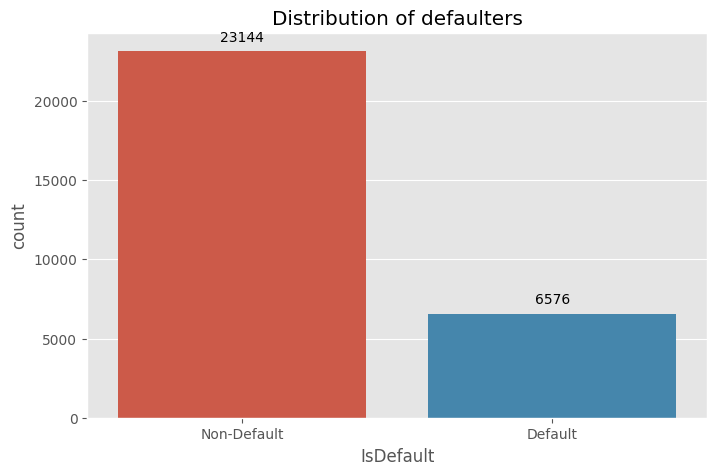

In [ ]:
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = crd_df["IsDefault"])
ax.set_xticklabels(['Non-Default', "Default"])
plt.title("Distribution of defaulters")

# Add count numbers to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

## Analysis on Numerical Data

In [ ]:
pd.crosstab(crd_df["EDUCATION"], crd_df['IsDefault'])

IsDefault,0,1
EDUCATION,,
1,8491,2020
2,10587,3302
3,3632,1222
4,434,32


In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

numeric_col=['LIMIT_BAL', 'AGE', 'BILL_AMT_APR', 'BILL_AMT_MAY','BILL_AMT_JUN', 'BILL_AMT_JUL',
             'BILL_AMT_AUG', 'BILL_AMT_SEPT', 'PAY_AMT_APR','PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL',
             'PAY_AMT_AUG', 'PAY_AMT_SEPT']

numeric_col_bill=['AGE', 'BILL_AMT_APR', 'BILL_AMT_MAY','BILL_AMT_JUN', 'BILL_AMT_JUL',
             'BILL_AMT_AUG', 'BILL_AMT_SEPT']            

numeric_col_pay = ['LIMIT_BAL', 'PAY_AMT_APR','PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']


numeric_data = crd_df[numeric_col]
numeric_data_bill = crd_df[numeric_col_bill]
numeric_data_pay = crd_df[numeric_col_pay]

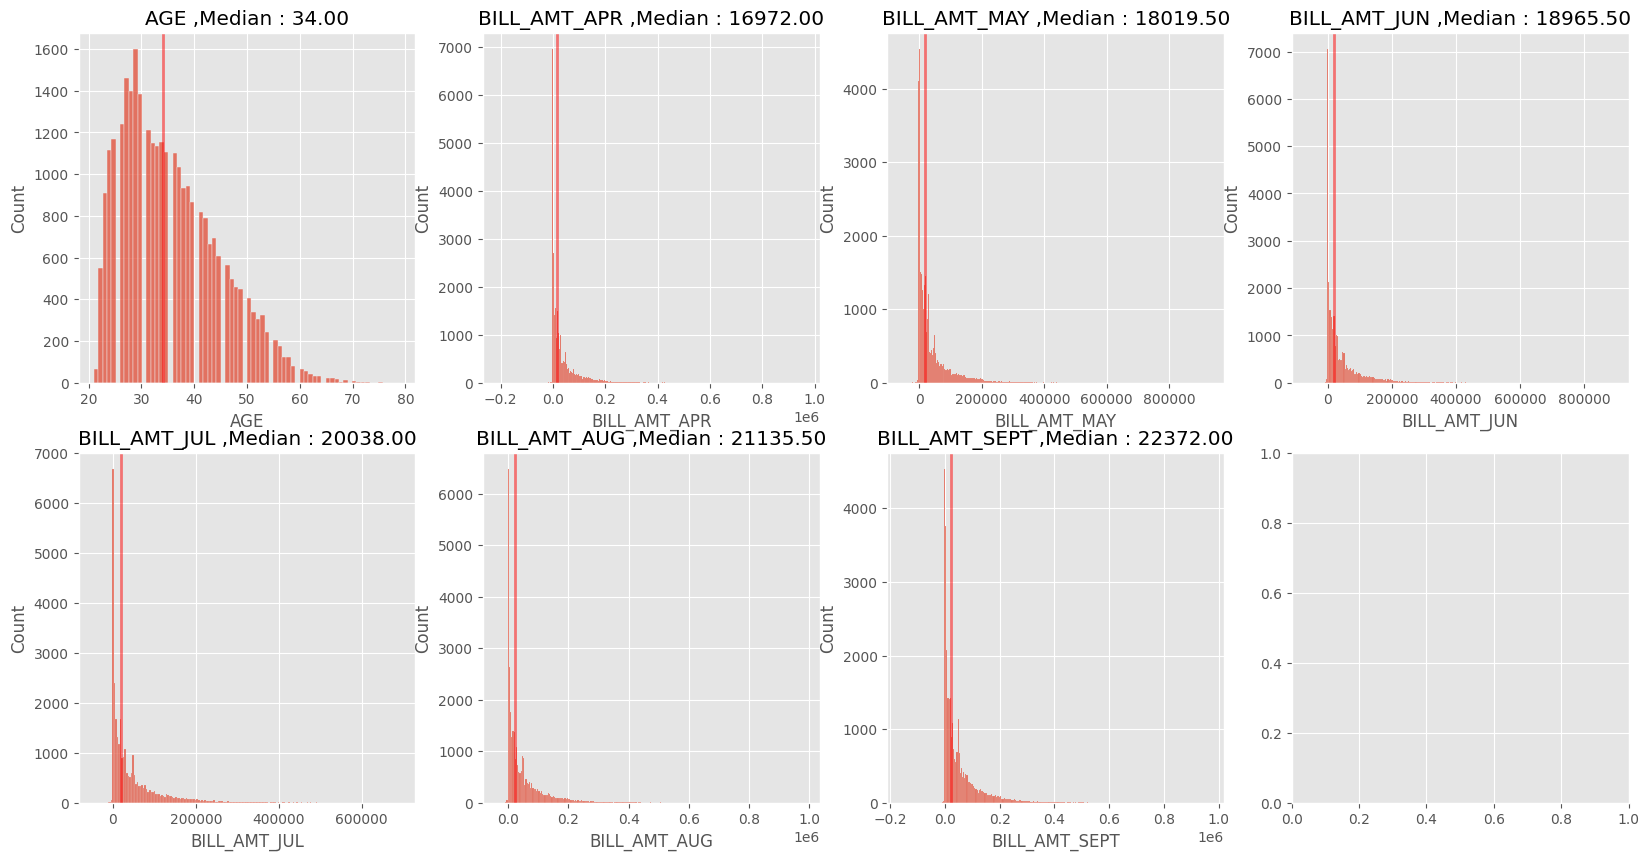

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for feature, ax in zip(numeric_data_bill, axes.flatten()):
    sns.histplot(data=numeric_data_bill[feature],ax=ax)
    median = numeric_data_bill[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

In [ ]:
def num_plot(col):
    
    plt.subplot(1,2,1)
    sns.histplot(x=col,hue=crd_df['IsDefault']);
    
    plt.subplot(1,2,2)
    sns.boxplot(y=col,x=crd_df['IsDefault']);

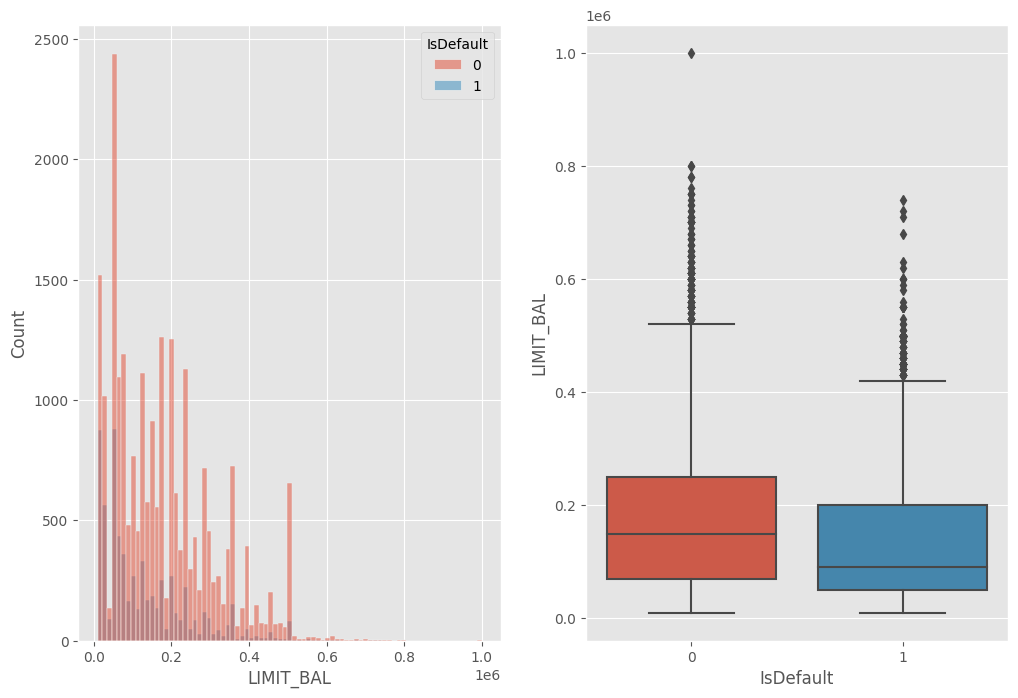

In [ ]:
num_plot(crd_df['LIMIT_BAL'])

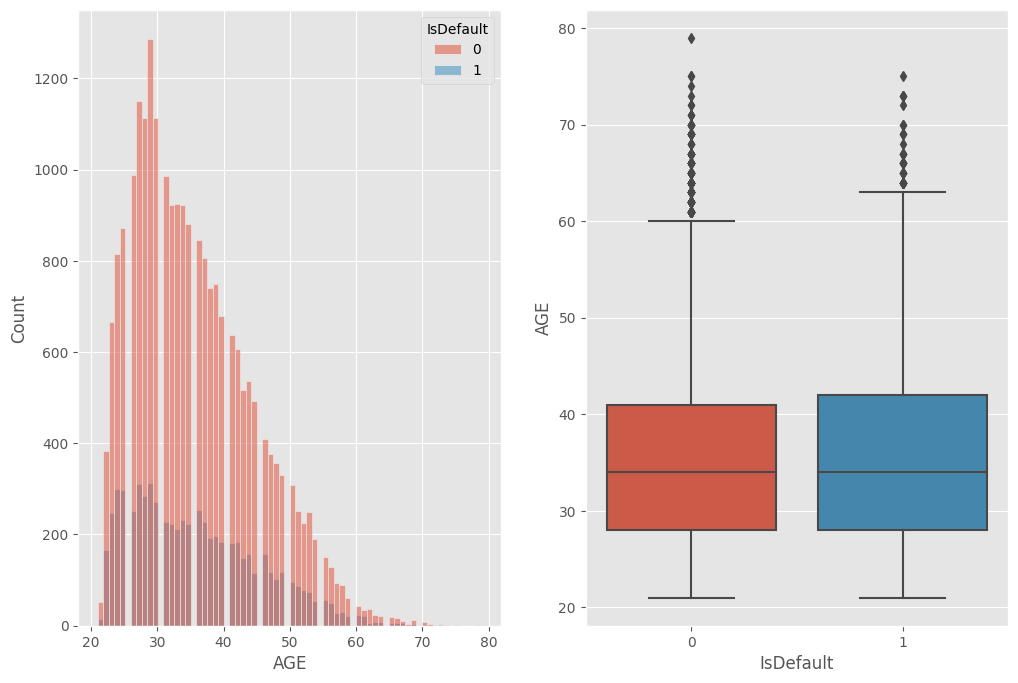

In [ ]:
num_plot(crd_df['AGE'])

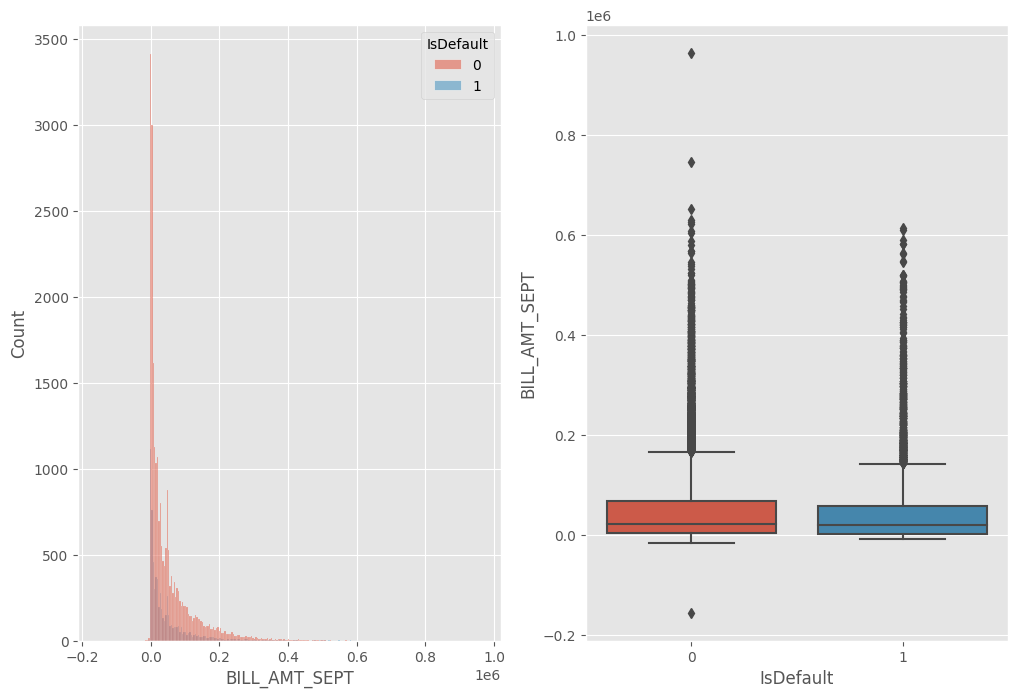

In [ ]:
num_plot(crd_df['BILL_AMT_SEPT'])

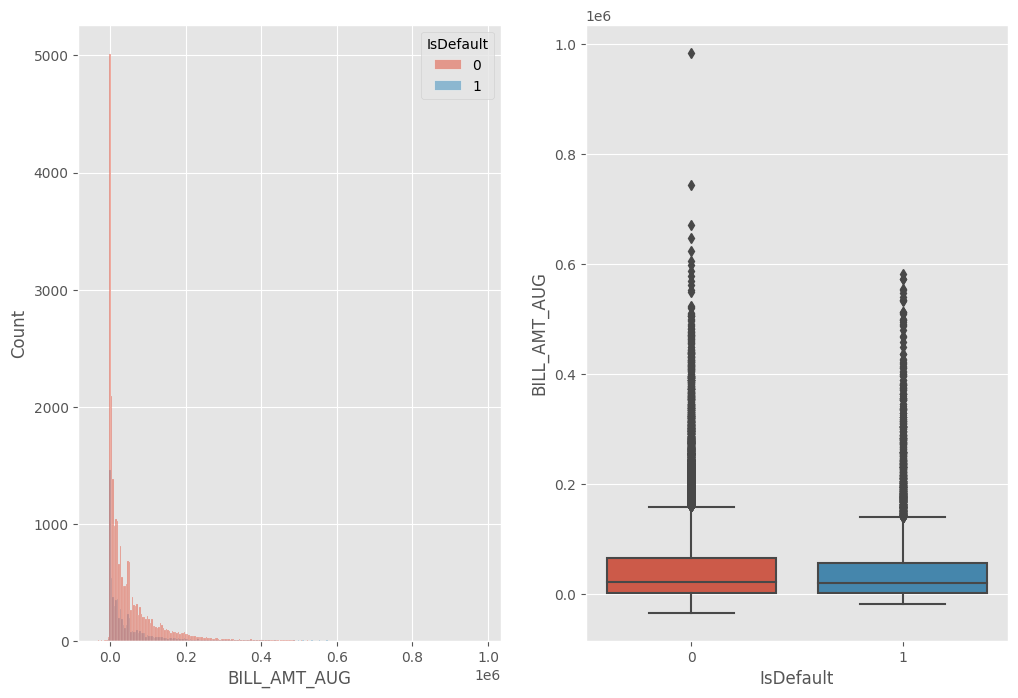

In [ ]:
num_plot(crd_df['BILL_AMT_AUG'])

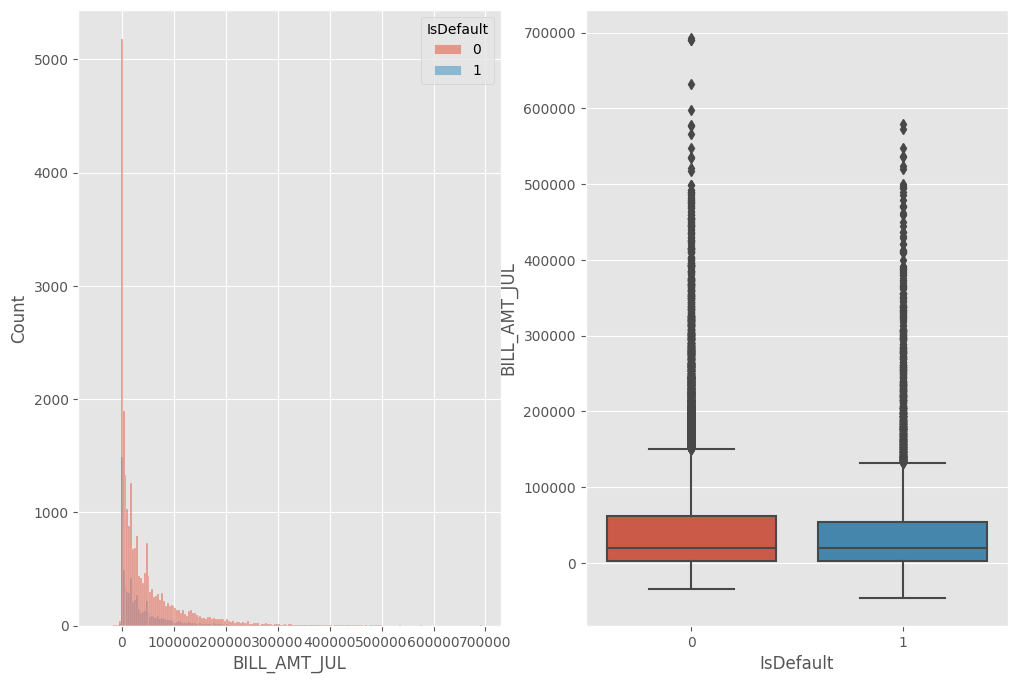

In [ ]:
num_plot(crd_df['BILL_AMT_JUL'])

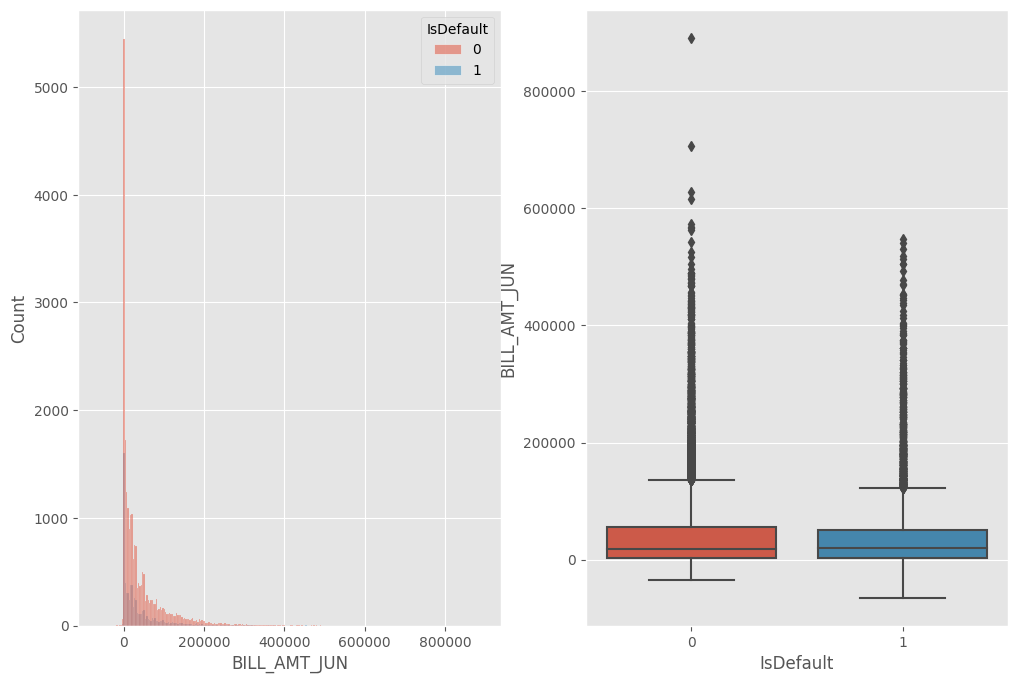

In [ ]:
num_plot(crd_df['BILL_AMT_JUN'])

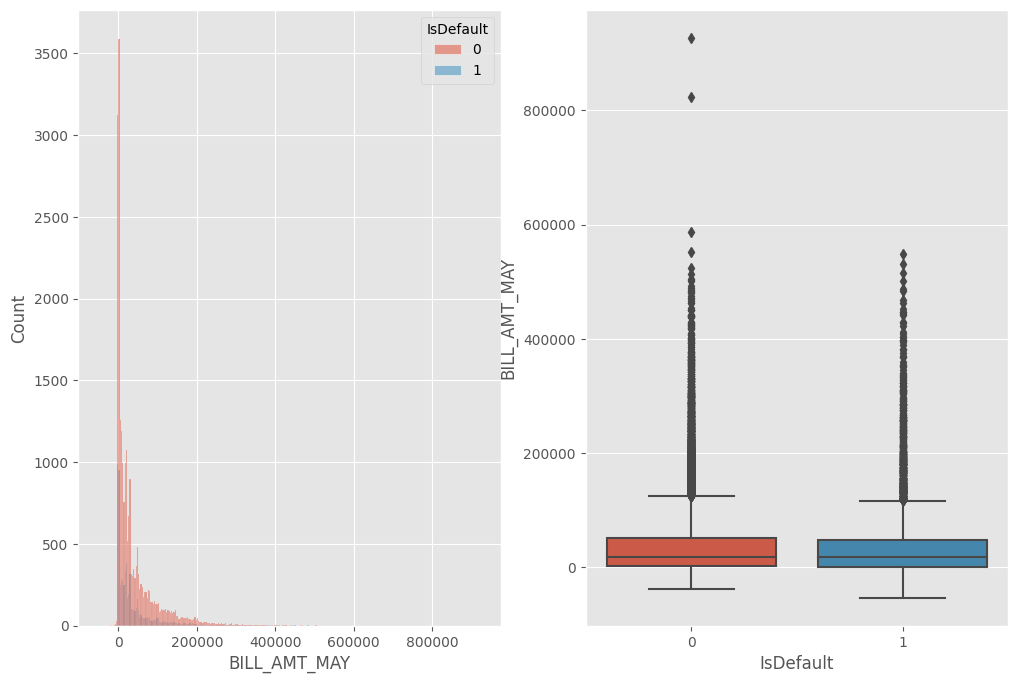

In [ ]:
num_plot(crd_df['BILL_AMT_MAY'])

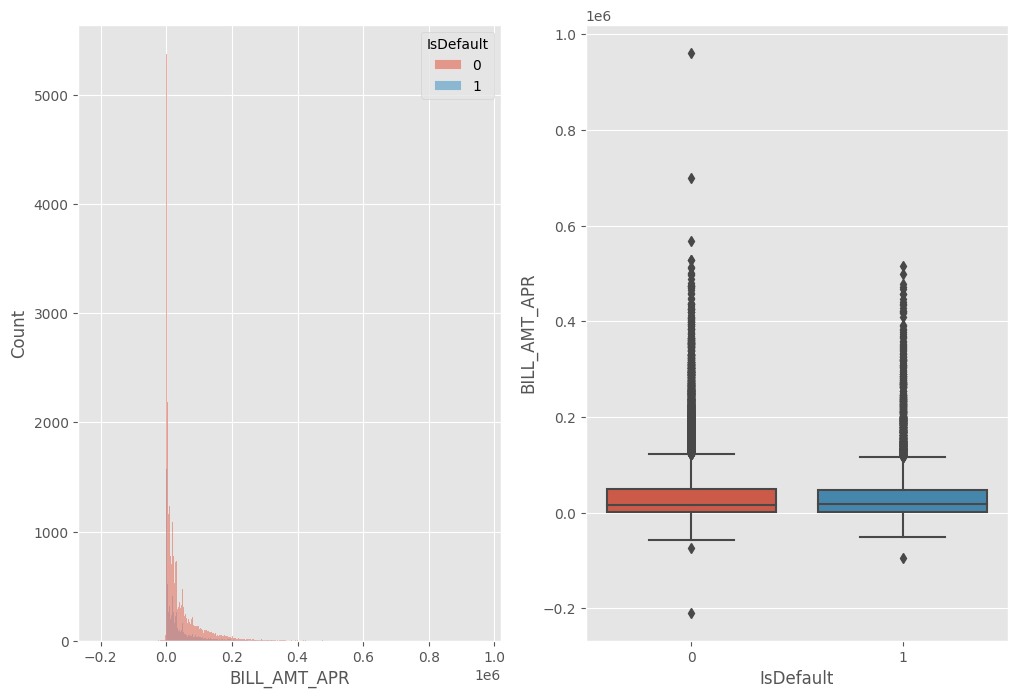

In [ ]:
num_plot(crd_df['BILL_AMT_APR'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


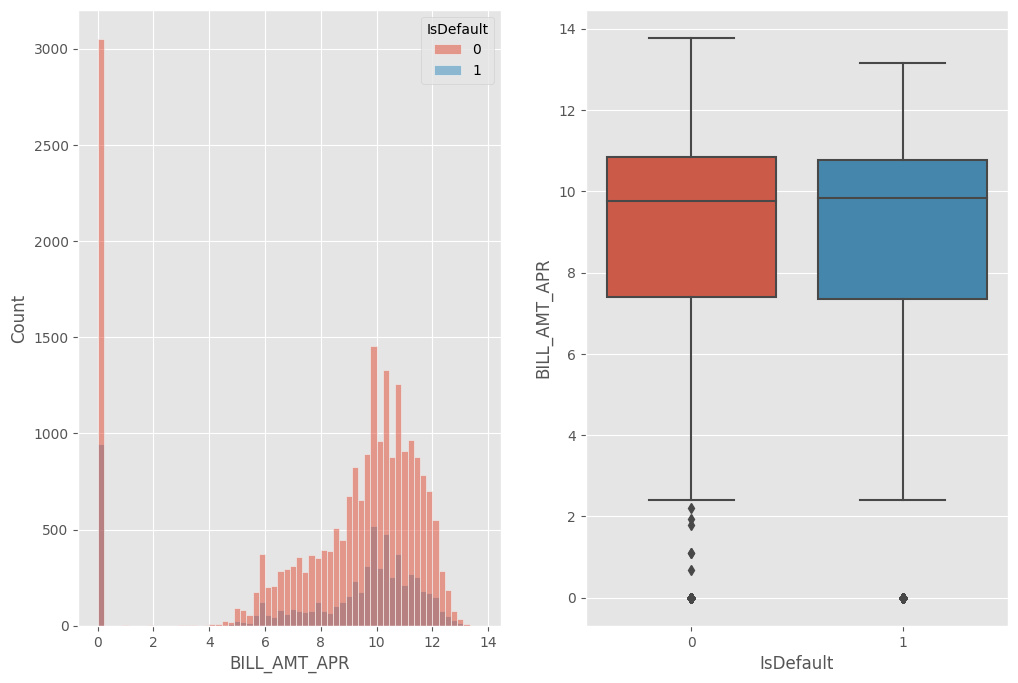

In [ ]:
num_plot(np.log1p(crd_df['BILL_AMT_APR']))

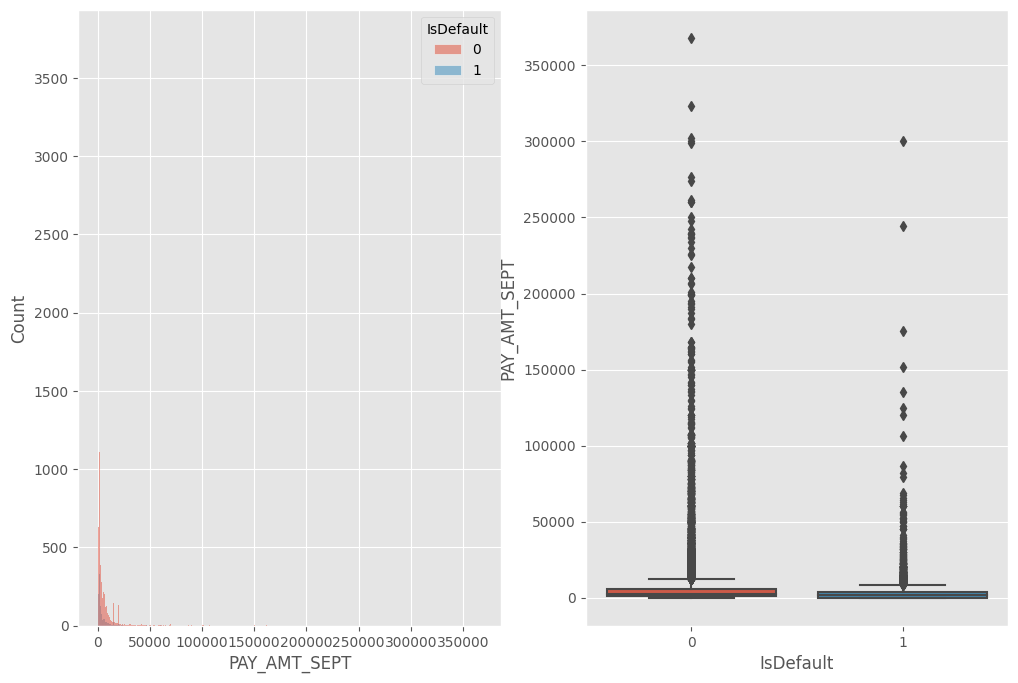

In [ ]:
num_plot(crd_df['PAY_AMT_SEPT'])

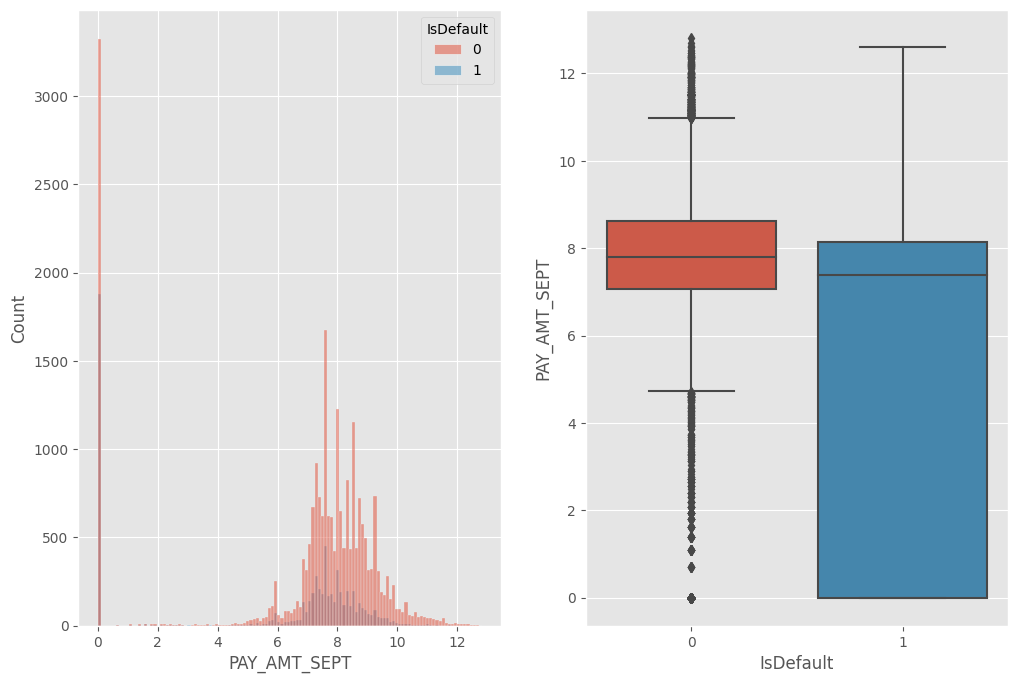

In [ ]:
num_plot(np.log1p(crd_df['PAY_AMT_SEPT']))

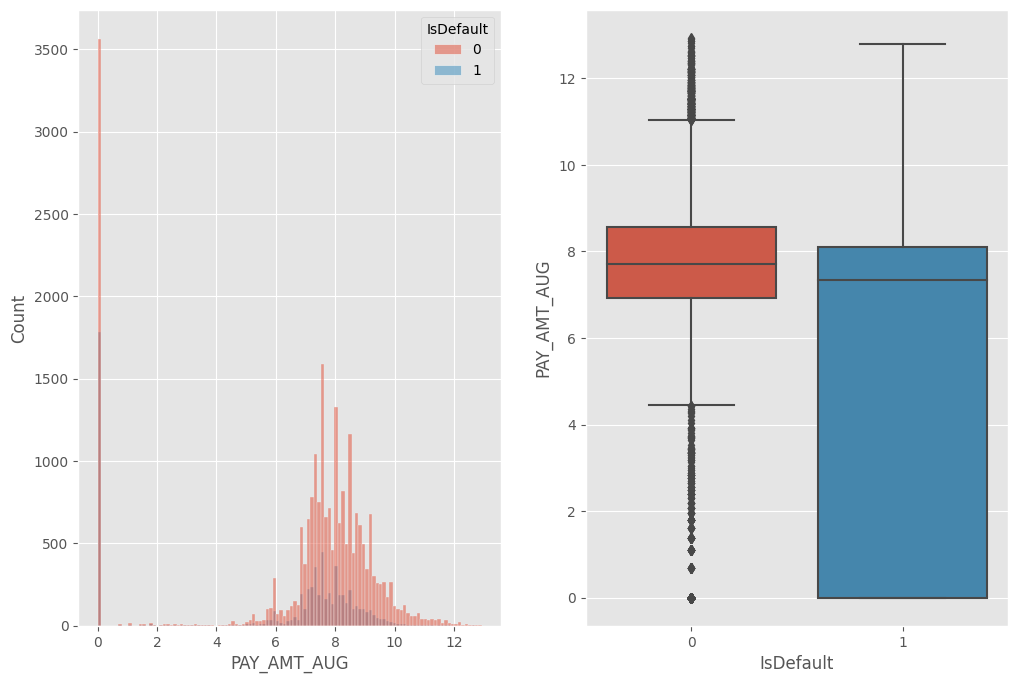

In [ ]:
num_plot(np.log1p(crd_df['PAY_AMT_AUG']))

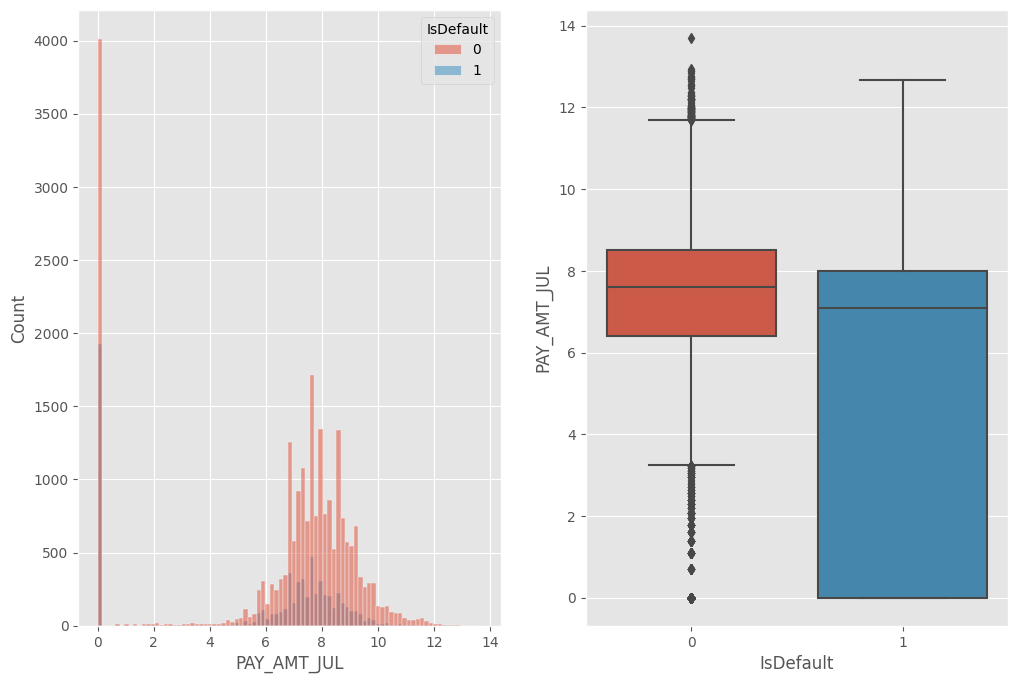

In [ ]:
num_plot(np.log1p(crd_df['PAY_AMT_JUL']))

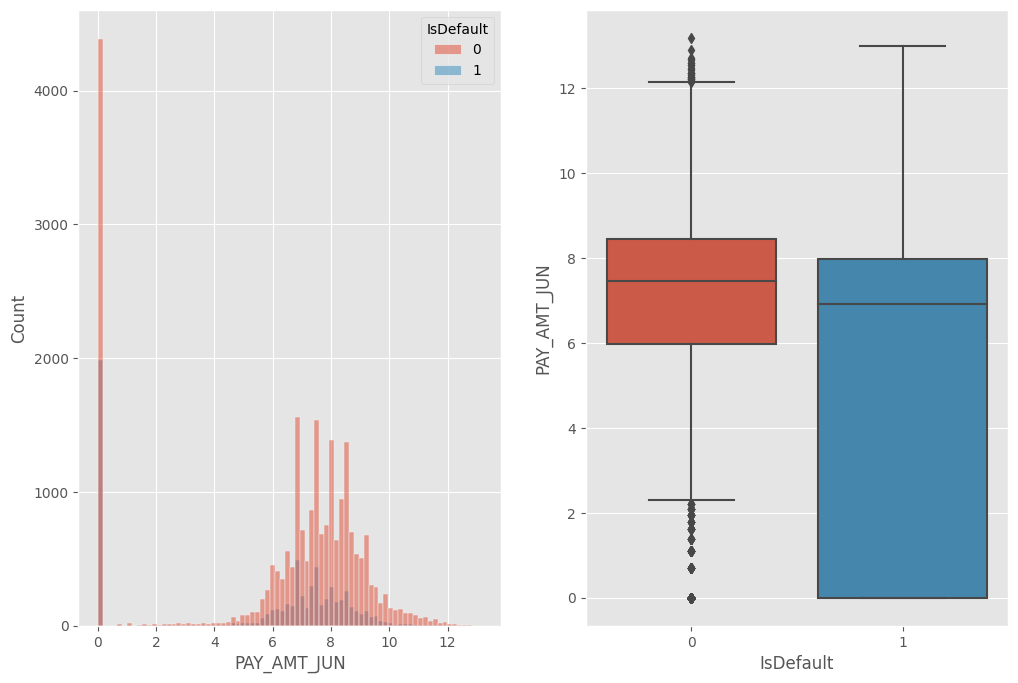

In [ ]:
num_plot(np.log1p(crd_df['PAY_AMT_JUN']))

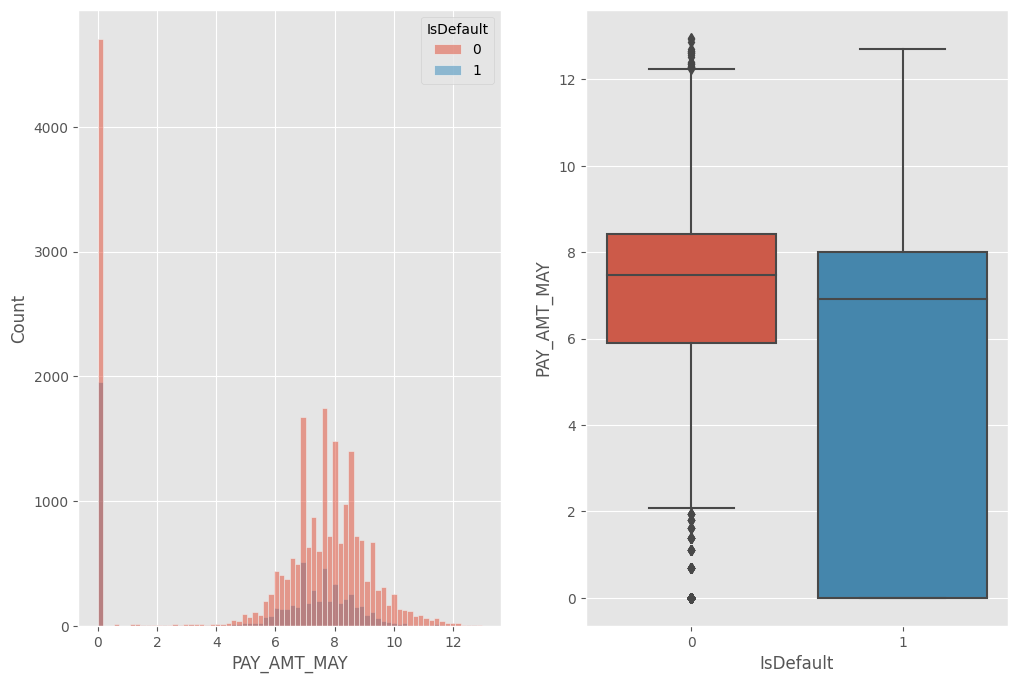

In [ ]:
num_plot(np.log1p(crd_df['PAY_AMT_MAY']))

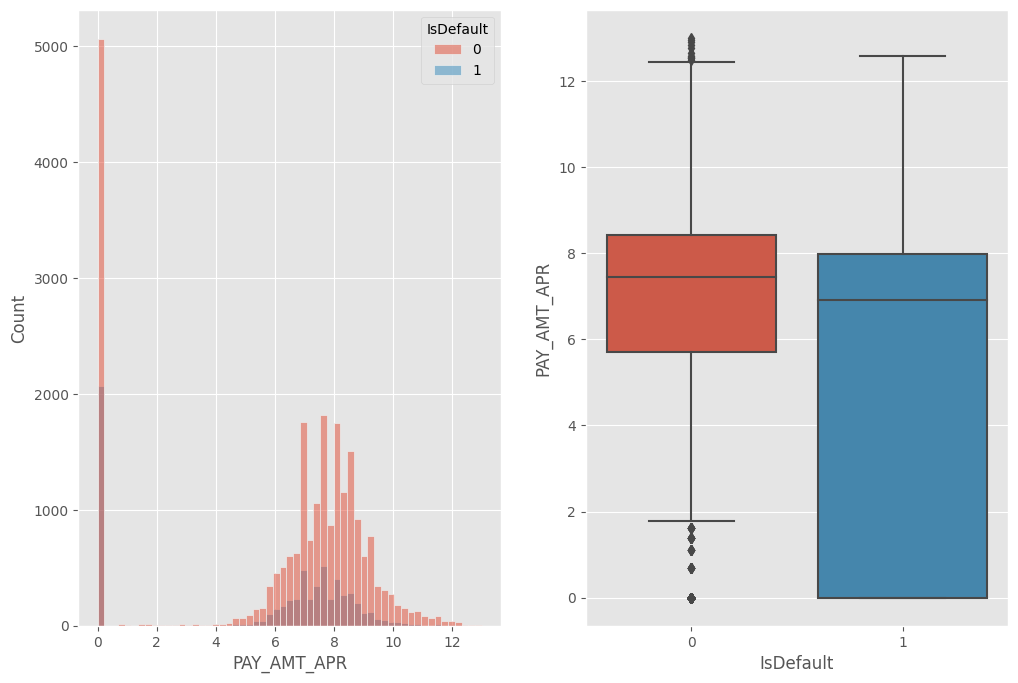

In [ ]:
num_plot(np.log1p(crd_df['PAY_AMT_APR']))

## Analysis on Categorical Data

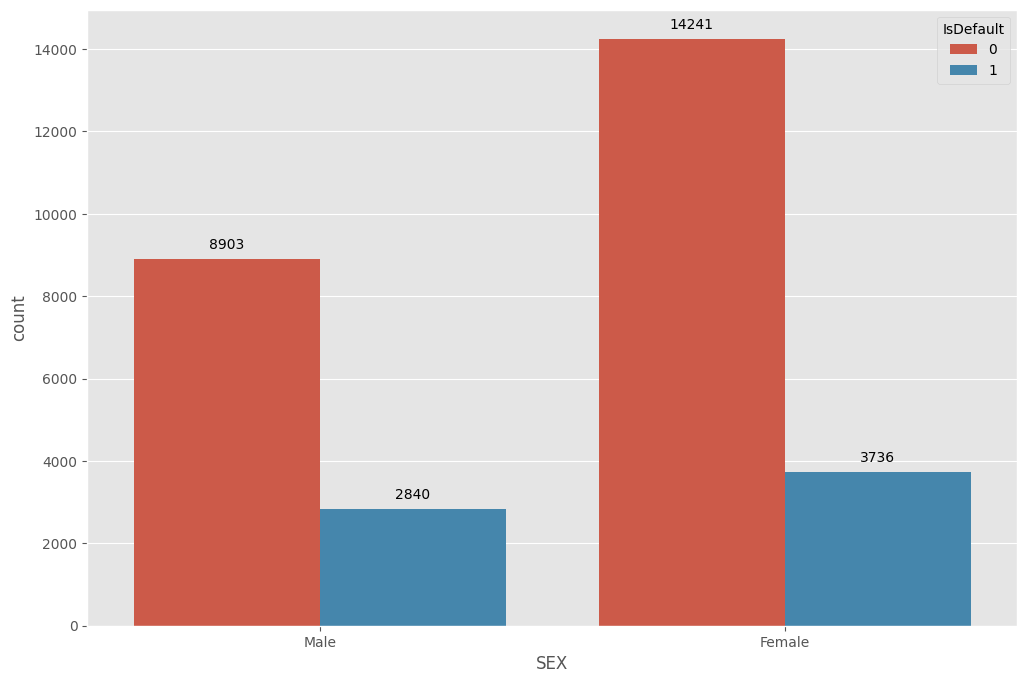

In [ ]:
ax = sns.countplot(x = crd_df['SEX'], hue = crd_df["IsDefault"], data = crd_df)
ax.set_xticklabels(['Male', "Female"])
# Add count numbers to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


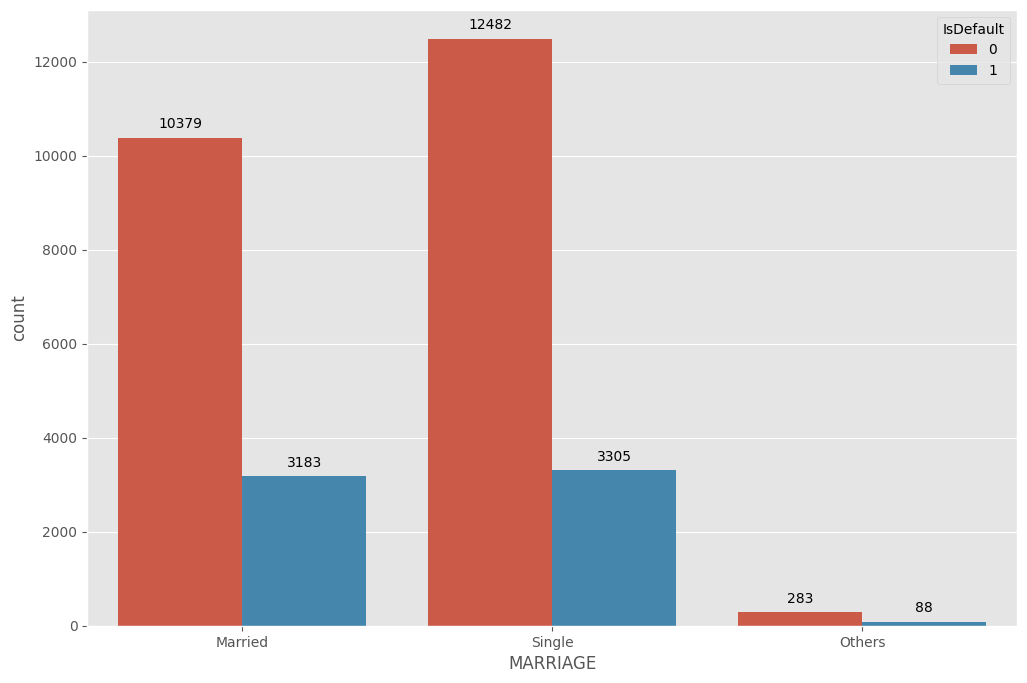

In [ ]:
# Create a countplot of MARRIAGE column in df DataFrame, with hue set to the default column 
# The resulting plot will show the distribution of defaulters and non-defaulters in each category of MARRIAGE column
ax2 = sns.countplot(x = crd_df['MARRIAGE'], hue = crd_df["IsDefault"], data = crd_df)

# Set the x-axis tick labels to Married, Single, and Others
ax2.set_xticklabels(['Married', "Single", 'Others'])

# Add count numbers to each bar
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

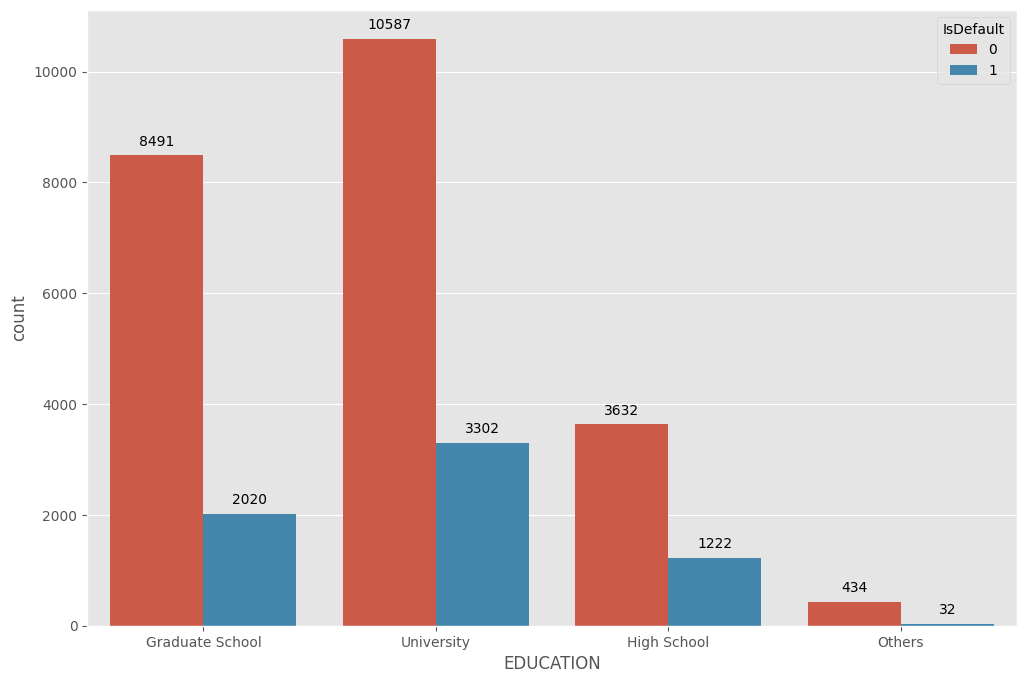

In [ ]:
ax3 = sns.countplot(x = crd_df['EDUCATION'], hue = crd_df["IsDefault"], data = crd_df)
ax3.set_xticklabels(['Graduate School', "University", 'High School', 'Others'])

# Add count numbers to each bar
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

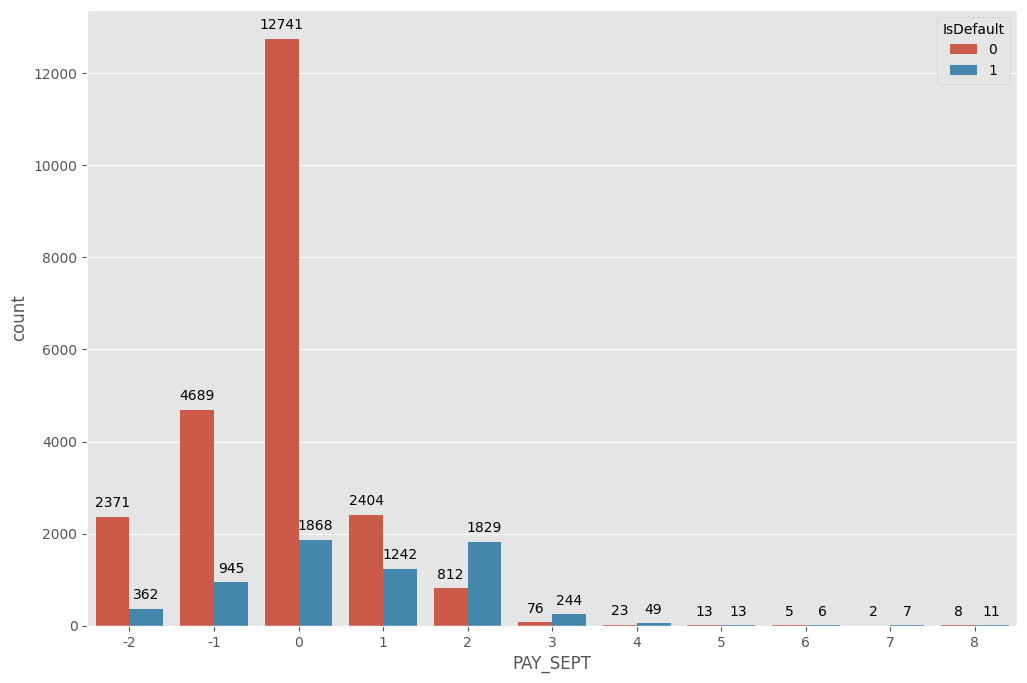

In [ ]:
ax4 = sns.countplot(x = crd_df['PAY_SEPT'], hue = crd_df["IsDefault"], data = crd_df)

# Add count numbers to each bar
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Data Preprocessing

## 1. One hot encoding for categorical features

In [ ]:
df_crd_wo_onehot = crd_df

In [ ]:
#one hot encoding of marriage, education and pay_status columns

def encoding(df):
  df = pd.get_dummies(df, columns=['EDUCATION', 'MARRIAGE', 'PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'])

  #label encoding of sex column
  df.loc[df["SEX"] == 2, "SEX"] = 0
  return df

In [ ]:
crd_df = encoding(crd_df)

In [ ]:
#split the Dataset

from sklearn.model_selection import train_test_split
#taking our target variable and storing it in y or output set
y = crd_df['IsDefault']

#consecutively, dropping the target variable or input set
X = crd_df.drop('IsDefault', axis=1)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=0)

## 2. Standardization

In [ ]:
def normalize_data(X_train, X_test):

    # Split the data into numerical and categorical features
    num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR']

    cat_cols = ['SEX','EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3','PAY_SEPT_-2',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-2',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-2',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-2',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-2',
       'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4',
       'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8', 'PAY_APR_-1',
       'PAY_APR_0', 'PAY_APR_2', 'PAY_APR_3', 'PAY_APR_4', 'PAY_APR_5',
       'PAY_APR_6', 'PAY_APR_7', 'PAY_APR_8']
    
    # Calculate the mean and standard deviation of the training data
    mean = X_train[num_cols].mean(axis=0)
    std = X_train[num_cols].std(axis=0)
    
    # Normalize the numerical training data
    X_train_norm = X_train.copy()
    X_train_norm[num_cols] = (X_train[num_cols] - mean) / std
    
    # Normalize the numerical test data using the mean and standard deviation of the training data
    X_test_norm = X_test.copy()
    X_test_norm[num_cols] = (X_test[num_cols] - mean) / std

    X_train_norm = X_train_norm[num_cols].join(X_train[cat_cols])
    X_test_norm = X_test_norm[num_cols].join(X_test_norm[cat_cols])
    
    return X_train_norm, X_test_norm

In [ ]:
X_train_norm, X_test_norm = normalize_data(X_train, X_test)

## 3. Balancing of Dataset

1. SMOT

In [ ]:
#With imblearn, we would oversample 

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_train_smot, y_train_smot = smote.fit_resample(X_train_norm, y_train)

<Axes: >

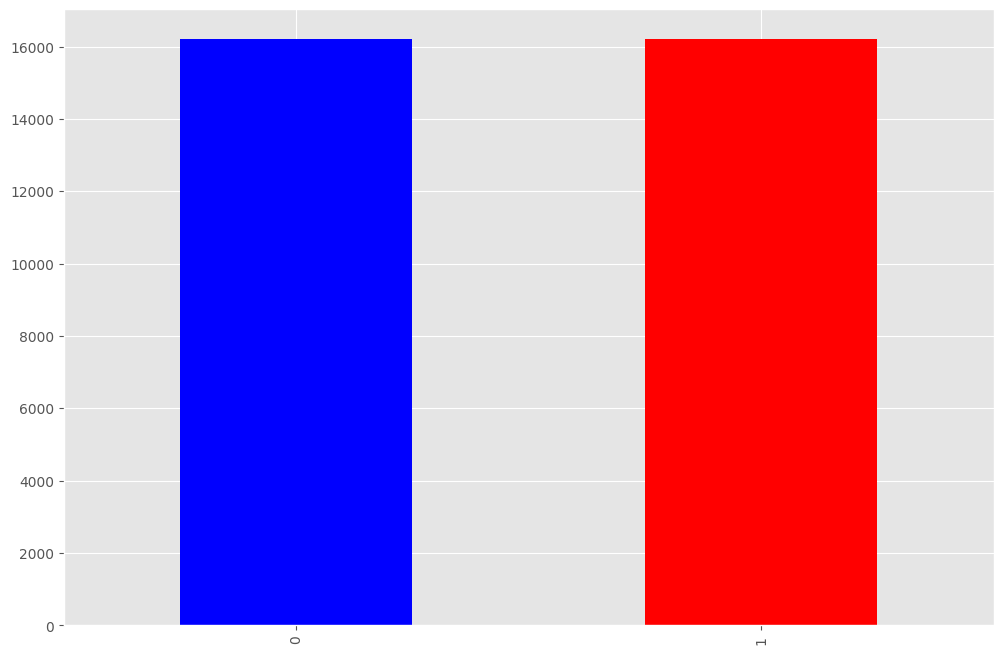

In [ ]:
df_crd_smot = pd.concat([pd.DataFrame(X_train_smot), pd.DataFrame(y_train_smot)], axis=1)

df_crd_smot['IsDefault'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

2. SMOTE-Tomek

In [ ]:
from imblearn.combine import SMOTETomek

s_tomek = SMOTETomek(random_state = 42)
X_train_sTomek, y_train_sTomek = s_tomek.fit_resample(X_train_norm, y_train)

<Axes: >

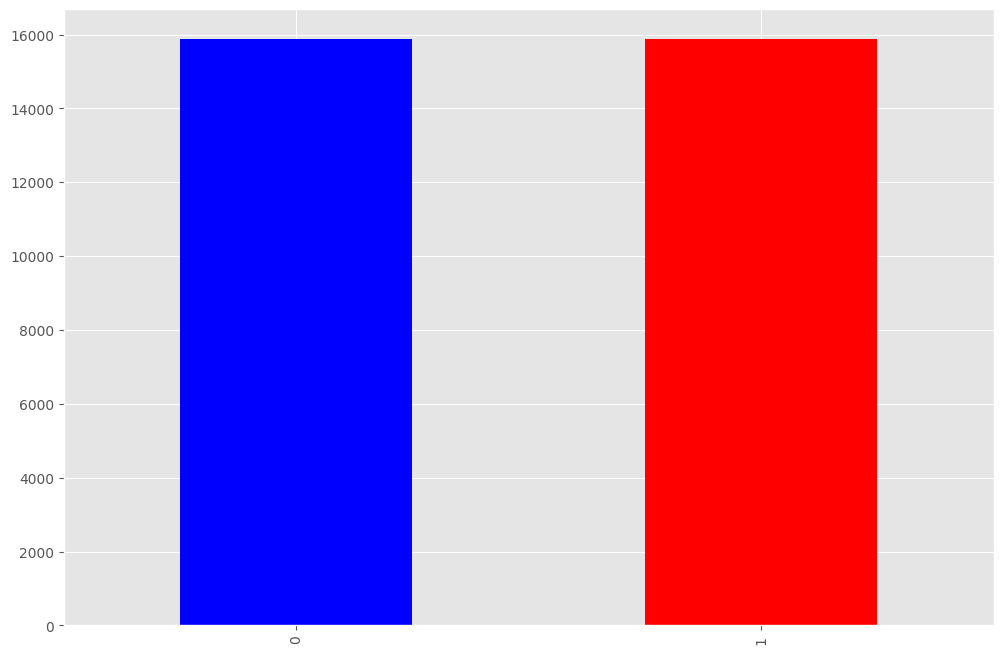

In [ ]:
df_crd_sTomek = pd.concat([pd.DataFrame(X_train_sTomek), pd.DataFrame(y_train_sTomek)], axis=1)

df_crd_sTomek['IsDefault'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

3. SMOTE-ENN

In [ ]:
from imblearn.combine import SMOTEENN

s_enn = SMOTEENN(random_state=42)
X_train_sENN, y_train_sENN = s_enn.fit_resample(X_train_norm, y_train)

<Axes: >

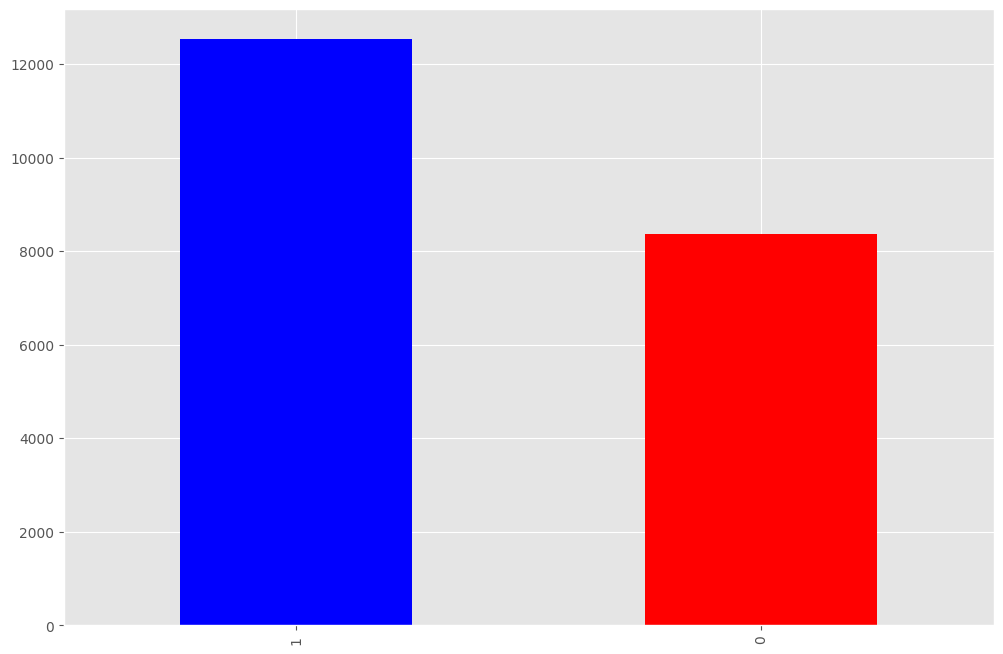

In [ ]:
df_crd_sENN = pd.concat([pd.DataFrame(X_train_sENN), pd.DataFrame(y_train_sENN)], axis=1)

df_crd_sENN['IsDefault'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

4. ENN - SMOTE

In [ ]:
# Data balancing with ENN and then SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

ENN = EditedNearestNeighbours(n_neighbors=3)
Smote = SMOTE(random_state = 42)
X_train_ENN, y_train_ENN = ENN.fit_resample(X_train_norm, y_train)
X_train_ENNs, y_train_ENNs = Smote.fit_resample(X_train_ENN, y_train_ENN)

<Axes: >

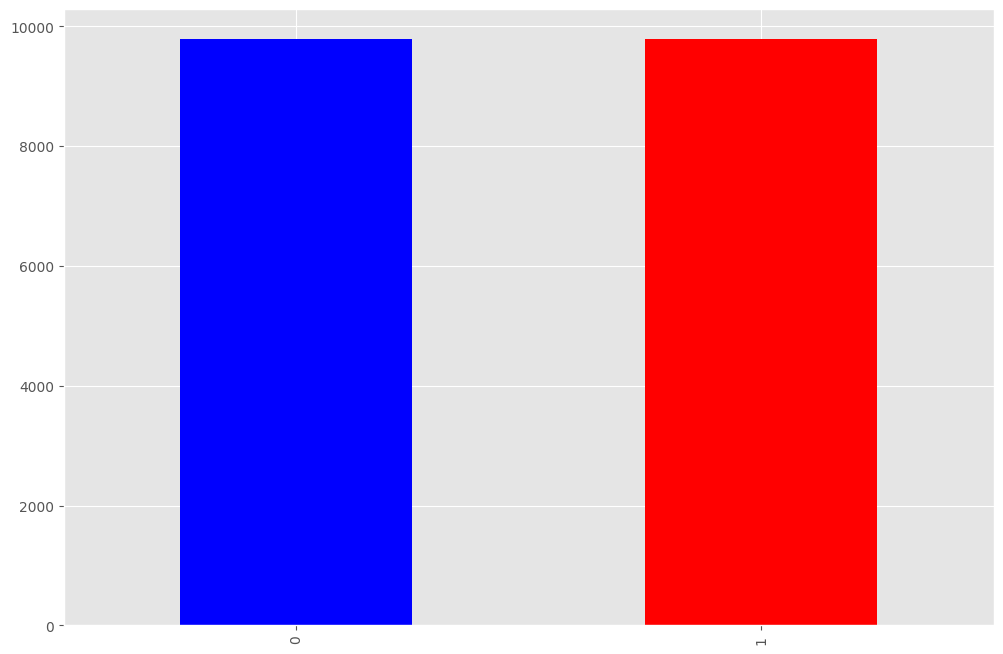

In [ ]:
df_crd_ENNs = pd.concat([pd.DataFrame(X_train_ENNs), pd.DataFrame(y_train_ENNs)], axis=1)
df_crd_ENNs['IsDefault'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

## 4. Feature Selection

### Z-test

In [ ]:
import scipy.stats as stats
import pandas as pd

# make a dataframe
zstats_df = pd.DataFrame()

# dataframe to join X_train and y_train
df = df_crd_wo_onehot

#taking our target variable and storing it in y or output set
y = df_crd_wo_onehot['IsDefault']
#consecutively, dropping the target variable or input set
X = df_crd_wo_onehot.drop('IsDefault', axis=1)


# df = X_train_norm.join(y_train)

# run a loop for all numerical variables
for eachvariable in X:
    tstats = stats.ttest_ind(df.loc[df["IsDefault"] == 1, eachvariable], df.loc[df["IsDefault"]==0, eachvariable])
    df_n = len(df.loc[df["IsDefault"] == 1, eachvariable]) + len(df.loc[df["IsDefault"] == 0, eachvariable]) - 2
    zstats = tstats[0] * np.sqrt(df_n / (df_n + 2))
    pvalue = stats.norm.sf(abs(zstats))*2 # two-tailed test
    temp = pd.DataFrame([eachvariable, zstats, pvalue]).T
    temp.columns = ["Variable Name", 'Z-Statistic', 'P-Value']
    zstats_df = pd.concat([zstats_df, temp], axis=0, ignore_index= True)

zstats_df= zstats_df.sort_values(by = "P-Value").reset_index(drop = True)
zstats_df

,Variable Name,Z-Statistic,P-Value
0,PAY_SEPT,59.337967,0.0
1,PAY_AUG,47.206693,0.0
2,PAY_JUL,41.728365,0.0
3,PAY_JUN,38.545029,0.0
4,PAY_MAY,36.126356,0.0
5,PAY_APR,32.952995,0.0
6,LIMIT_BAL,-26.974954,0.0
7,PAY_AMT_SEPT,-14.255184,0.0
8,PAY_AMT_AUG,-12.823406,0.0
9,PAY_AMT_JUL,-11.035706,0.0


In [ ]:
selected_ztest_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

### Mutual Information/ F-score- optional

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df_crd_ENNs.iloc[:,:-1]
y = df_crd_ENNs.iloc[:,-1:]

In [ ]:
import matplotlib.pyplot as plt 
# compares with target variable to select the features 
# higher values represents higher dependency on target variable 

def select_feature_MI(X_train, y_train):   
    Sb = SelectKBest(score_func = mutual_info_classif, k = 'all')
    Sb.fit(X_train, y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected, fs = select_feature_MI(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs.scores_})

selected_features_df = selected_features_df.sort_values(by='Scores', ascending= False).loc[selected_features_df['Scores'] > np.mean(selected_features_df['Scores'])]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
selected_features_df

,features,Scores
0,LIMIT_BAL,0.212617
1,AGE,0.203276
17,PAY_SEPT,0.153798
18,PAY_AUG,0.114310
19,PAY_JUL,0.079842
20,PAY_JUN,0.075226
21,PAY_MAY,0.070562


In [ ]:
np.mean(selected_features_df['Scores'])

0.12994727424209357

In [ ]:
def select_feature_f(X_train, y_train):
    
    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs_f.scores_})

selected_features_df.sort_values(by='Scores', ascending= False).loc[selected_features_df['Scores'] > np.mean(selected_features_df['Scores'])]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,features,Scores
17,PAY_SEPT,4353.111363
18,PAY_AUG,2765.469172
19,PAY_JUL,1981.864029
20,PAY_JUN,1705.195433
21,PAY_MAY,1471.827607
0,LIMIT_BAL,1448.235127
22,PAY_APR,1305.680010


In [ ]:
np.mean(selected_features_df['Scores'])

275.58701283035725

### Feature selection for Decision Tree using feature importance

In [ ]:
# # Creating Sample Dataframe for Decision tree Feture Selection
# df_sample = crd_df.sample(frac=0.75, random_state=42)
# X_dt = df_sample.iloc[:,:-1]
# y_dt = df_sample.iloc[:,-1:]
# X_train_dt,X_test_dt,y_train_dt,y_test_dt= train_test_split(X_dt,y_dt,test_size=0.3, random_state=0)

X_train_dt = X_train_norm.sample(frac=0.75, random_state=42)
y_train_dt = y_train.sample(frac=0.75, random_state=42)

ENN = EditedNearestNeighbours(n_neighbors=3)
Smote = SMOTE(random_state = 42)
X_train_dt, y_train_dt = ENN.fit_resample(X_train_dt, y_train_dt)
X_train_dt, y_train_dt = Smote.fit_resample(X_train_dt, y_train_dt)

In [ ]:
#default threshhold is mean of importance
from sklearn.tree import DecisionTreeClassifier

dt = SelectFromModel(DecisionTreeClassifier())
dt.fit(X_train_dt, y_train_dt)

SelectFromModel(estimator=DecisionTreeClassifier())

In [ ]:
dt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
selected_feat= X_train_dt.columns[(dt.get_support())]
len(selected_feat)

17

In [ ]:
print(selected_feat)

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX', 'PAY_SEPT_2', 'PAY_AUG_2'],
      dtype='object')


### Feature selection for Logistic Regression using feature importance

In [ ]:
# Sample Dataframe for logistic Regression

# df_sample = crd_df.sample(frac=0.75, random_state=42)
# X_lr = df_sample.iloc[:,:-1]
# y_lr = df_sample.iloc[:,-1:]
# X_train_lr,X_test_lr,y_train_lr,y_test_lr= train_test_split(X_lr,y_lr,test_size=0.3, random_state=0)

X_train_lr = X_train_norm.sample(frac=0.75, random_state=42)
y_train_lr = y_train.sample(frac=0.75, random_state=42)

ENN = EditedNearestNeighbours(n_neighbors=3)
Smote = SMOTE(random_state = 42)
X_train_lr, y_train_lr = ENN.fit_resample(X_train_lr, y_train_lr)
X_train_lr, y_train_lr = Smote.fit_resample(X_train_lr, y_train_lr)

# X_train_lr,X_test_lr, y_train_lr,  y_test_lr = fitdata(X_train_lr, X_test_lr, y_train_lr, y_test_lr)

In [ ]:
len(X_train_lr.columns)

85

In [ ]:
X_train_lr.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_SEPT_-2',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-2', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-2', 'PAY_JUN_-1', 'PAY_JUN_0',
       'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5',
       'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JU

In [ ]:
len(X_test_norm.columns)

85

In [ ]:
X_test_norm.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_SEPT_-2',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-2', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-2', 'PAY_JUN_-1', 'PAY_JUN_0',
       'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5',
       'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JU

In [ ]:
#Listing all values we want to try as C value
C=[100,50,20,10,1,0.75,0.50, 0.25, 0.1,0.05, 0.025, 0.01, 0.005, 0.0025,0.001]#Intiate Metric of zeros with 6 columns and and rows equal to len(C)
l1_metrics=np.zeros((len(C),6))#Adding first column as value C
l1_metrics[:,0]=C# Run a for loop over the range of C list length
for index in range(0, len(C)):
    # Initialize and fit Logistic Regression with the C candidate
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(X_train_lr, y_train_lr)
    # Predict on the testing data
    y_pred = logreg.predict(X_test_norm)
    # Create non-zero count and all metrics columns
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = accuracy_score(y_test, y_pred)
    l1_metrics[index,3] = precision_score(y_test, y_pred)
    l1_metrics[index,4] = recall_score(y_test, y_pred)
    l1_metrics[index,5] = f1_score(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall','F1_score']
print(pd.DataFrame(l1_metrics, columns=col_names))

           C  Non-Zero Coeffs  Accuracy  Precision    Recall  F1_score
0   100.0000             67.0  0.765253   0.479075  0.604628  0.534579
1    50.0000             67.0  0.765141   0.478884  0.604628  0.534460
2    20.0000             63.0  0.765814   0.480000  0.603622  0.534759
3    10.0000             63.0  0.765926   0.480208  0.604125  0.535086
4     1.0000             59.0  0.764693   0.478226  0.607646  0.535224
5     0.7500             59.0  0.764468   0.477918  0.609658  0.535809
6     0.5000             54.0  0.763683   0.476658  0.611167  0.535596
7     0.2500             46.0  0.762337   0.474720  0.618712  0.537235
8     0.1000             39.0  0.757290   0.467091  0.628270  0.535822
9     0.0500             38.0  0.750449   0.456893  0.631791  0.530293
10    0.0250             31.0  0.739009   0.441491  0.643360  0.523644
11    0.0100             22.0  0.736317   0.437650  0.640845  0.520106
12    0.0050             16.0  0.727008   0.426789  0.653924  0.516488
13    

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
lr = SelectFromModel(LogisticRegression(penalty = 'l1', C =0.05, solver = 'liblinear'))
lr.fit(X_train_lr, y_train_lr)

SelectFromModel(estimator=LogisticRegression(C=0.05, penalty='l1',
                                             solver='liblinear'))

In [ ]:
lr.get_feature_names_out()

array(['LIMIT_BAL', 'AGE', 'BILL_AMT_JUL', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_SEPT_-2', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1',
       'PAY_SEPT_2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_2', 'PAY_JUL_-2',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_2', 'PAY_JUN_-2', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_MAY_-2', 'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_APR_-1',
       'PAY_APR_0'], dtype=object)

In [ ]:
len(lr.get_feature_names_out())

38

### SVM

In [ ]:
# Sample Dataframe for SVM

# df_sample = crd_df.sample(frac=0.5, random_state=42)
# X_svm = df_sample.iloc[:,:-1]
# y_svm = df_sample.iloc[:,-1:]
# X_train_svm, X_test_svm, y_train_svm ,y_test_svm= train_test_split(X_svm,y_svm,test_size=0.3, random_state=0)

X_train_svm = X_train_norm.sample(frac=0.5, random_state=42)
y_train_svm = y_train.sample(frac=0.5, random_state=42)


ENN = EditedNearestNeighbours(n_neighbors=3)
Smote = SMOTE(random_state = 42)
X_train_svm, y_train_svm = ENN.fit_resample(X_train_svm, y_train_svm)
X_train_svm, y_train_svm = Smote.fit_resample(X_train_svm, y_train_svm)

# X_train_svm, X_test_svm, y_train_svm,  y_test_svm = fitdata(X_train_svm, X_test_svm, y_train_svm, y_test_svm)

# X_train_svm,X_test, y_train_svm, y_test = fitdata(X_train_svm, X_test_svm, y_train_svm, y_test_svm )

In [ ]:
from sklearn.svm import SVC

cv = StratifiedKFold(5)
selector = RFECV(SVC(kernel = 'linear', C=1), cv = cv, scoring = 'f1')
selector = selector.fit(X_train_svm, y_train_svm)
selector.support_

In [ ]:
selector.feature_names_in_

In [ ]:
selector.ranking_

### Logistic Regression

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression as kr

cv = StratifiedKFold(5)
selector = RFECV(kr(), step=1, cv=cv, scoring = 'f1')
selector = selector.fit(X_train, y_train)
selector.support_

C:\Users\vinan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([ True, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False])

In [ ]:
selector.feature_names_in_

array(['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'SEX', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_SEPT_-2', 'PAY_SEPT_-1', 'PAY_SEPT_0',
       'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-2', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-2', 'PAY_JUN_-1', 'PAY_JUN_0',
       'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5',
       'PAY_JUN_6', 'PAY_JUN_7', 

In [ ]:
selector.ranking_

array([ 1, 11,  1,  1,  1, 12,  4,  3,  1,  1,  5, 13,  9,  7,  8,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 17, 18,  1,
        1,  1,  1,  1,  1,  1,  1, 16, 15, 23,  1,  1,  1,  1,  1,  1,  1,
        1, 10,  1, 14,  1,  1,  1,  1,  1,  1,  2,  1, 19,  1, 21,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 20,  1,  1,  6,  1,  1,  1,  1,  1, 22])

### Decision Tree

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier as dtc


cv = StratifiedKFold(5)
selector = RFECV(dtc(), step=1, cv = cv, scoring = 'f1')
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
selector.feature_names_in_

array(['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'SEX', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_SEPT_-2', 'PAY_SEPT_-1', 'PAY_SEPT_0',
       'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-2', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-2', 'PAY_JUN_-1', 'PAY_JUN_0',
       'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5',
       'PAY_JUN_6', 'PAY_JUN_7', 

In [ ]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  8,
        7, 27,  3,  5, 16,  1,  1,  1,  1, 13, 29, 37, 41, 35, 46, 48, 32,
       18, 20, 56, 26, 25, 39, 64, 66, 67, 65, 19,  6, 14, 42, 22, 31, 43,
       54, 53, 58, 59, 21, 11, 12, 52,  9, 36, 57, 38, 44, 45, 51, 24, 34,
       10, 23, 40, 33, 30, 49, 47, 50, 17,  2, 15, 28, 55, 60, 61, 62, 63])

# Model Implementation

## Preprocessing

In [ ]:
class Preprocessing:



    def __init__(self, X, y):

        self.X=X
        self.y=y


    def splitdata(self):
        X_train,X_test,y_train,y_test= train_test_split(self.X,self.y,test_size=0.3, random_state=0)

        return X_train,X_test,y_train,y_test
    

    def smot(self,X,y):
        ENN = EditedNearestNeighbours(n_neighbors=3)
        Smote = SMOTE(random_state = 42)
        X, y = ENN.fit_resample(X, y)
        X, y = Smote.fit_resample(X, y)
        return X,y


    def numericaldata(self,X):
        
        num_df = X[['LIMIT_BAL','AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR']]
        
        return num_df


    def categoricaldata(self,X):
        
        cat_df = X[['SEX','EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3','PAY_SEPT_-2',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-2',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-2',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-2',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-2',
       'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4',
       'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8', 'PAY_APR_-1',
       'PAY_APR_0', 'PAY_APR_2', 'PAY_APR_3', 'PAY_APR_4', 'PAY_APR_5',
       'PAY_APR_6', 'PAY_APR_7', 'PAY_APR_8']]
        return cat_df
        
    
    
    def combinedataframe(self,X,Y):
        
        comb_df = X.join(Y)
        
        return comb_df
        
        

    def normalizetrainingdata(self,X):

        mean=np.mean(X,0)

        std=np.std(X,0)

        normalizedtrainingdata=(X-mean)/std

        return normalizedtrainingdata, mean, std



    def normalizetestdata(self,X,trainmean,trainstd):

        normalizedtestdata=(X-trainmean)/trainstd

        return normalizedtestdata



    def datafit(self,X, y):

        X_train,X_test,y_train,y_test=self.splitdata()
        
        X_train,y_train = self.smot(X_train,y_train)
        
        n_train = self.numericaldata(X_train)
        
        c_train = self.categoricaldata(X_train)
        
        n_test = self.numericaldata(X_test)
        
        c_test = self.categoricaldata(X_test)

        n_train,mean,std=self.normalizetrainingdata(n_train)

        n_test=self.normalizetestdata(n_test,mean,std)
        
        X_train = self.combinedataframe(n_train,c_train)
        
        X_test = self.combinedataframe(n_test,c_test)
        
        return X_train,X_test,y_train,y_test

In [ ]:
a = Preprocessing(X, y)

## 1. Logistic Regression model

In [ ]:
class LogisticRegression:
    
  def __init__(self,X, y, learningRate, tolerance, maxIteration) -> None:
    self.X = X
    self.X = X
    self.tolerance = tolerance
    self.learningRate = learningRate
    self.maxIteration = maxIteration
  

  def add_X0(self, X):                                         
    return np.column_stack([np.ones([X.shape[0], 1]), X])

  def sigmoid(self, z):
    sig = 1/(1+np.exp(-z))
    return sig

  def costFunction(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    # approach1
    cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
    cost = -cost/X.shape[0]
    # approach2
    #cost = (np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))-X.dot(self.w).dot(y)))
    #cost = cost.sum()
    return cost
  
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    gradient = (sig-y).dot(X)
    return gradient
  
  def gradientDescent(self, X, y):
    errors = []
    last_error = float('inf')
    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X, y)
      current_error = self.costFunction(X, y)
      diff = last_error - current_error
      last_error = current_error
      errors.append(current_error)

      if np.abs(diff) < self.tolerance:
        print('model stopped learning')
        break
    return
  
  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)               


  def evaluate(self, y, y_hat):
    y1 = (y==1)
    y1_hat = (y_hat == 1)                
    recall = (y1 & y1_hat).sum()/y1.sum()
    precision = (y1 & y1_hat).sum()/y1_hat.sum()
    f_score = 2*(precision*recall)/(precision+recall)
    accuracy = np.sum(y1 == y1_hat)/len(y1)
    
    y2 = (y==0)
    y2_hat = (y_hat == 0)                
    specificity = (y2 & y2_hat).sum()/y2.sum()
    #accuracy = np.sum(y2 == y2_hat)/len(y2)
    ROC_AUC = 0.5*(recall + specificity)
    
    return f_score, recall, precision, accuracy, specificity, ROC_AUC

  
  def fit(self):
    
    X_train, X_test, y_train, y_test = a.datafit(X,y)
    
    # with Feature importance
    X_train = X_train[lr.get_feature_names_out()]
    X_test = X_test[lr.get_feature_names_out()]

    X_train = self.add_X0(X_train)
    X_test = self.add_X0(X_test)
    print('Solving using GD')
    self.w = np.ones(X_train.shape[1], dtype=np.float64)*0
    self.gradientDescent(X_train, y_train)
    # print(self.w)   # to check the values of gradients
    y_train_hat = self.predict(X_train)
    f_score1, recall1, precision1, accuracy1, specificity1, ROC_AUC1 = self.evaluate(y_train, y_train_hat)
    print('Training F1 score {}'.format(f_score1))
    print('Training recall score {}'.format(recall1))
    print('Training precision score {}'.format(precision1))
    print('Training Accuracy Score {}'.format(accuracy1))
    print('Training specificity score {}'.format(specificity1))
    print('Training ROC_AUC score {}'.format(ROC_AUC1))
    print('------------------------------------------------------')
    y_test_hat = self.predict(X_test)
    #y_test = np.array(y_test)
    f_score2, recall2, precision2, accuracy2, specificity2, ROC_AUC2 = self.evaluate(y_test, y_test_hat)
    self.plot_roc_curve(y_test, y_test_hat)
    self.plot_precision_recall_curve(y_test, y_test_hat)
    print('Testing F1 score {}'.format(f_score2))
    print('Testing recall score {}'.format(recall2))
    print('Testing precision score {}'.format(precision2))
    print('Testing Accuracy Score {}'.format(accuracy2))
    print('Testing specificity score {}'.format(specificity2))
    print('Testing ROC_AUC score {}'.format(ROC_AUC2))
  
  def plot_roc_curve(self, y_train, y_pred):
        fpr, tpr, thresholds = roc_curve(y_train, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Logistic Regression ROC Curve')
        plt.legend(loc="lower right")
        plt.show()   

  def plot_precision_recall_curve(self, y_train, y_pred):
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
        plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Logistic Regression Precision-Recall Curve')
        plt.legend(loc="lower right")
        plt.show() 

  def plot_error(self, error_sequence):        

    # Data for plotting
    s = np.array(error_sequence)
    t = np.arange(s.size)

    fig, ax = plt.subplots()
    ax.plot(t, s,label='alpha')

    #ax.set(xlabel='iterations', ylabel=self.error,
    #       title='{} trend'.format(self.error))
    ax.grid()

    plt.legend(bbox_to_anchor=(1.05,1),loc=2, shadow=True)
    plt.xlabel('iterations')
    plt.ylabel('Cost Function')
    plt.show()  

With feature selection



 Performance of the model for Learning Rate :  0.0003
Solving using GD


100%|██████████| 10000/10000 [00:52<00:00, 189.28it/s]


Training F1 score 0.7877602207173313
Training recall score 0.888235294117647
Training precision score 0.7077061739522308
Training Accuracy Score 0.7606900452488687
Training specificity score 0.6331447963800905
Training ROC_AUC score 0.7606900452488687
------------------------------------------------------


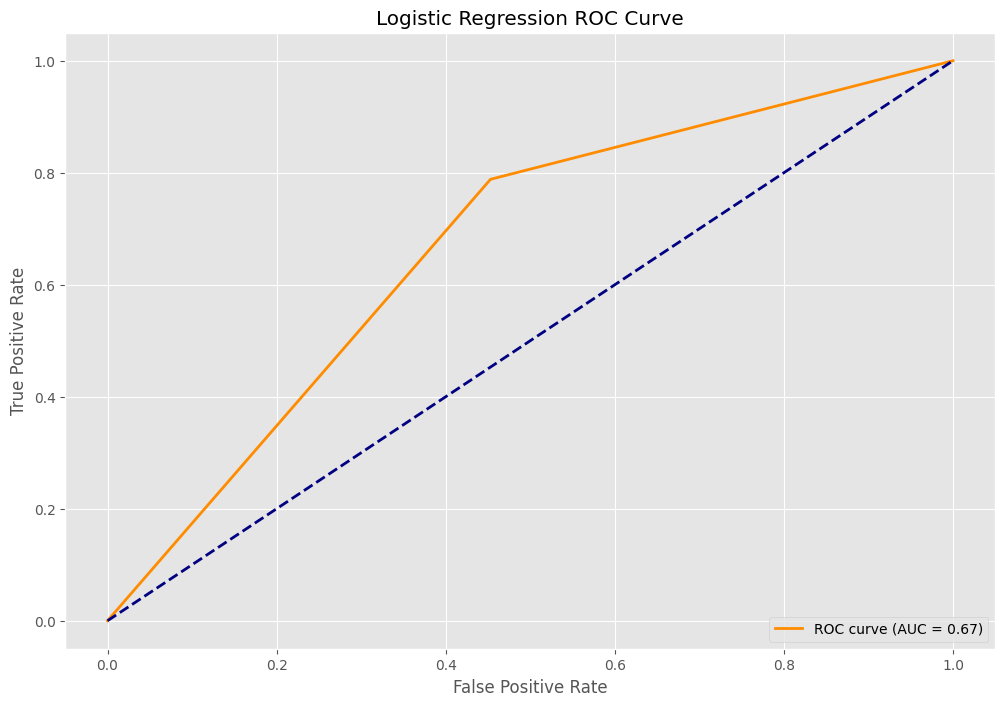

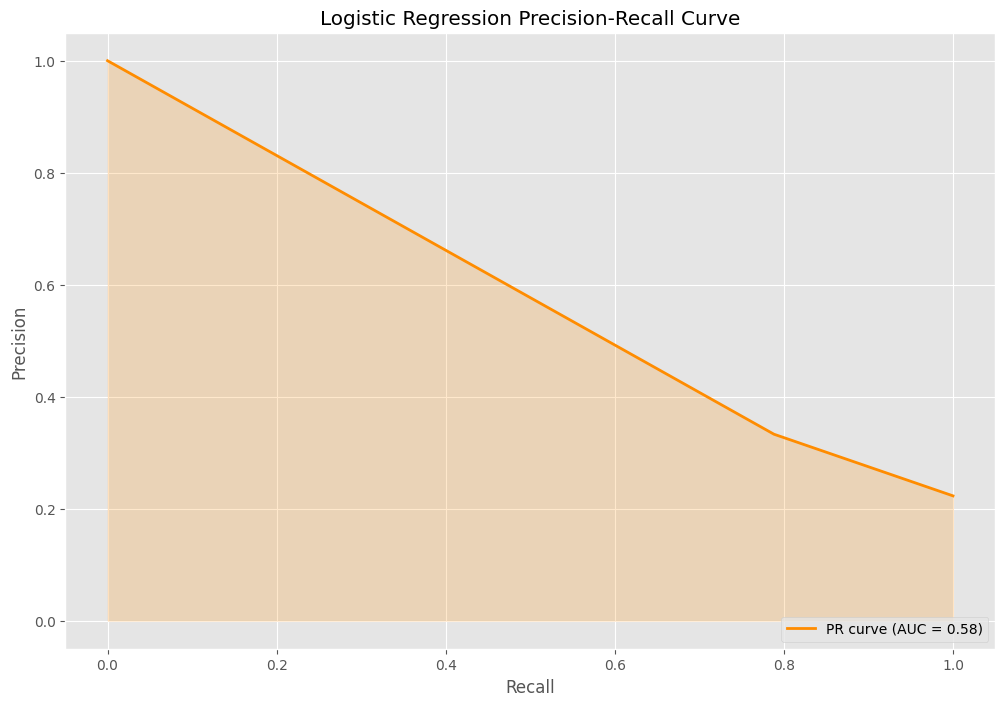

Testing F1 score 0.4682504108770357
Testing recall score 0.7882293762575453
Testing precision score 0.3330499468650372
Testing Accuracy Score 0.6008299685957829
Testing specificity score 0.5470554272517321
Testing ROC_AUC score 0.6676424017546387
None
MODEL'S RUNTIME :  63.02023768424988


 Performance of the model for Learning Rate :  0.0005
Solving using GD


 43%|████▎     | 4328/10000 [00:24<00:32, 175.97it/s]


model stopped learning
Training F1 score 0.8038832503309588
Training recall score 0.7212669683257918
Training precision score 0.9078741278655845
Training Accuracy Score 0.8240384615384615
Training specificity score 0.9268099547511313
Training ROC_AUC score 0.8240384615384615
------------------------------------------------------


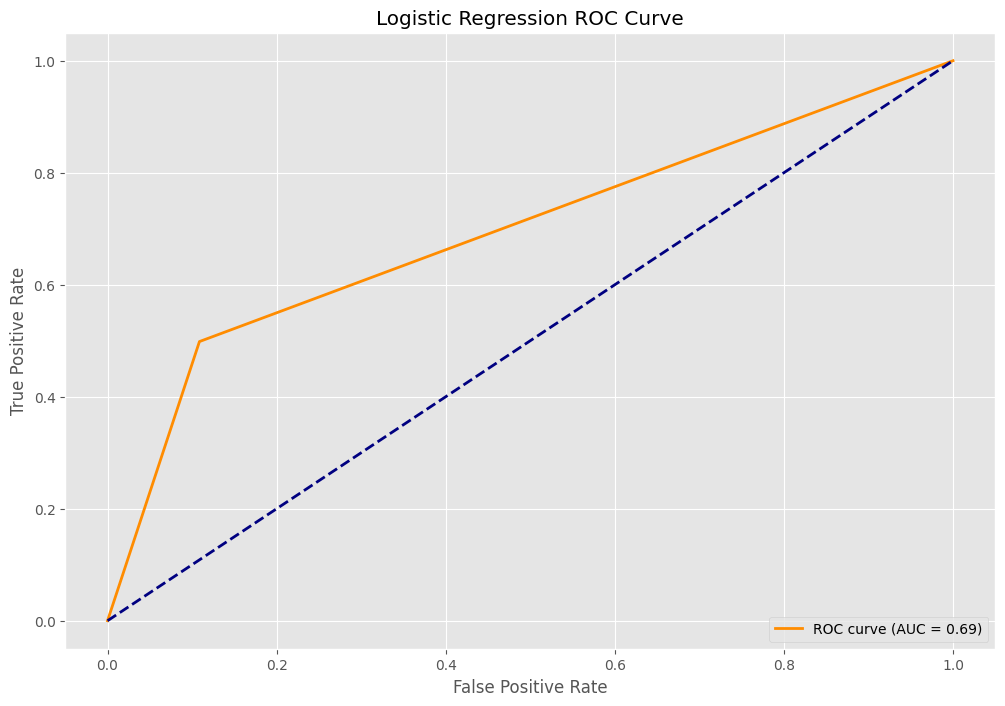

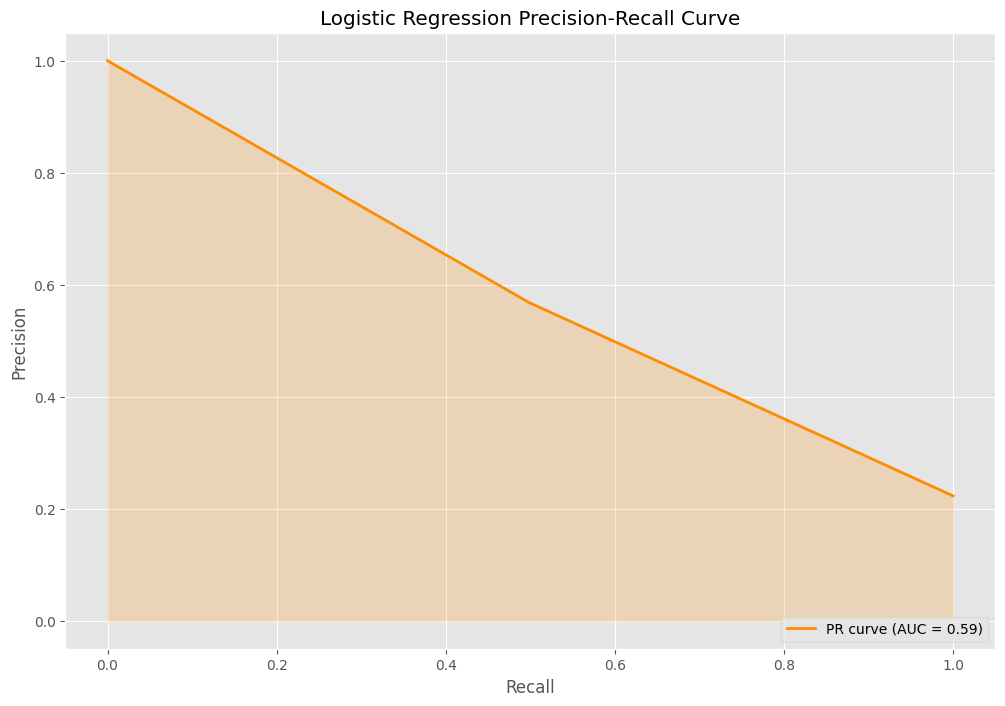

Testing F1 score 0.5310825294748125
Testing recall score 0.4984909456740443
Testing precision score 0.5682339449541285
Testing Accuracy Score 0.803723642889188
Testing specificity score 0.891310623556582
Testing ROC_AUC score 0.6949007846153131
None
MODEL'S RUNTIME :  33.63737869262695


 Performance of the model for Learning Rate :  0.0007
Solving using GD


  4%|▍         | 375/10000 [00:02<01:06, 145.49it/s]


model stopped learning
Training F1 score 0.8103395345981457
Training recall score 0.7464932126696833
Training precision score 0.8861286424063382
Training Accuracy Score 0.8252828054298642
Training specificity score 0.9040723981900453
Training ROC_AUC score 0.8252828054298642
------------------------------------------------------


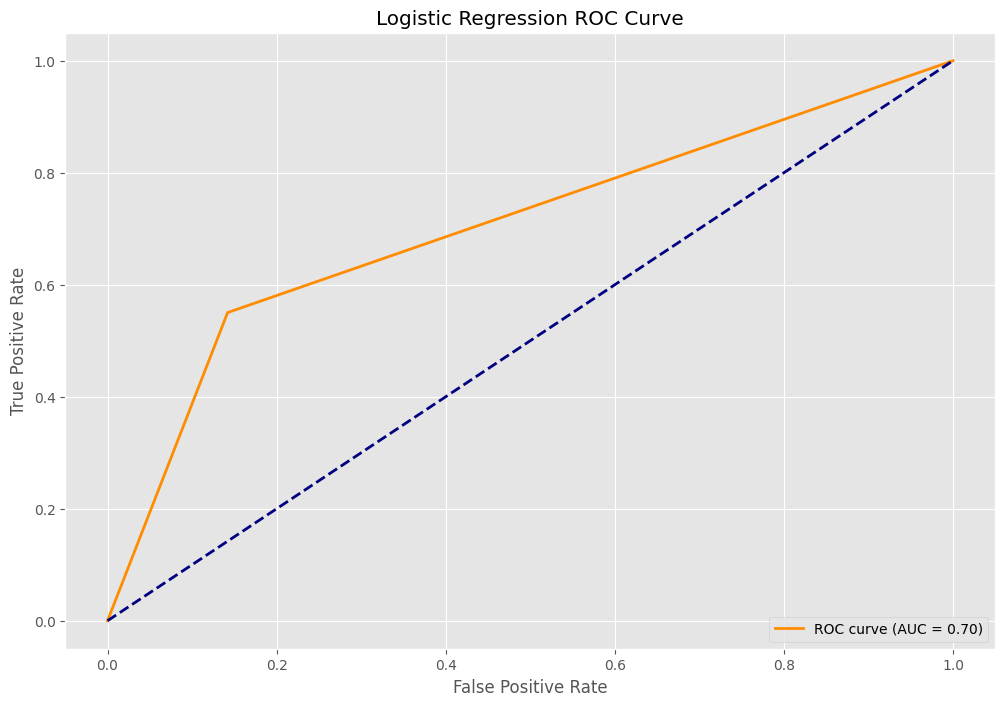

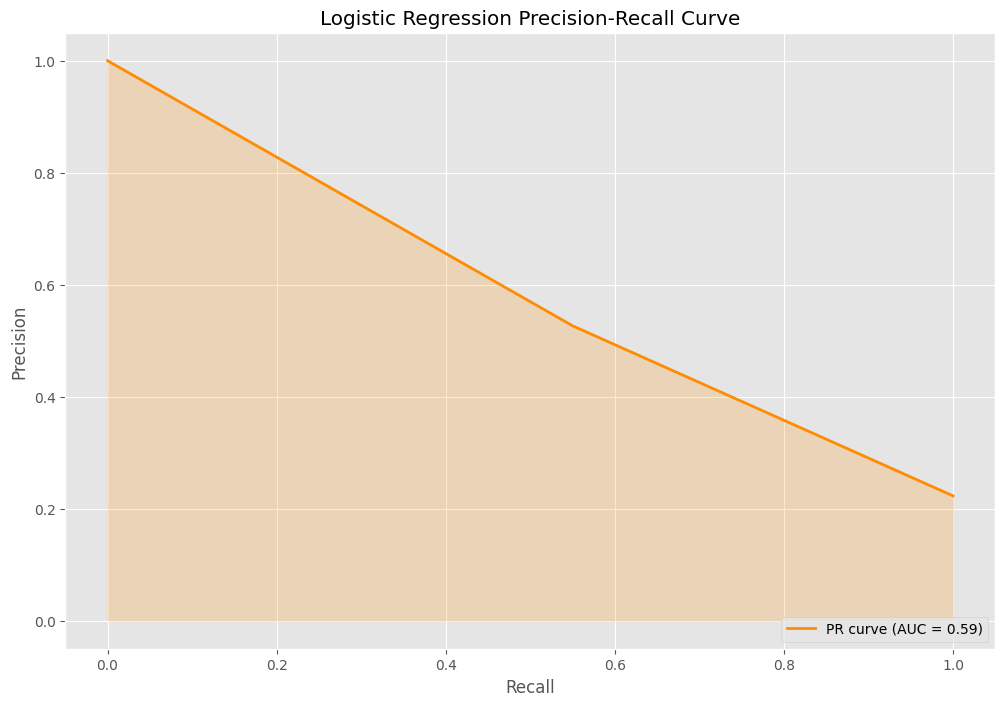

Testing F1 score 0.5381210034431874
Testing recall score 0.5503018108651911
Testing precision score 0.5264677574590952
Testing Accuracy Score 0.7893674293405114
Testing specificity score 0.8579676674364896
Testing ROC_AUC score 0.7041347391508403
None
MODEL'S RUNTIME :  12.353786706924438


 Performance of the model for Learning Rate :  0.0008
Solving using GD


  2%|▏         | 219/10000 [00:01<00:55, 176.10it/s]


model stopped learning
Training F1 score 0.8041344266081533
Training recall score 0.7876696832579185
Training precision score 0.8213021939136589
Training Accuracy Score 0.8081447963800905
Training specificity score 0.8286199095022625
Training ROC_AUC score 0.8081447963800905
------------------------------------------------------


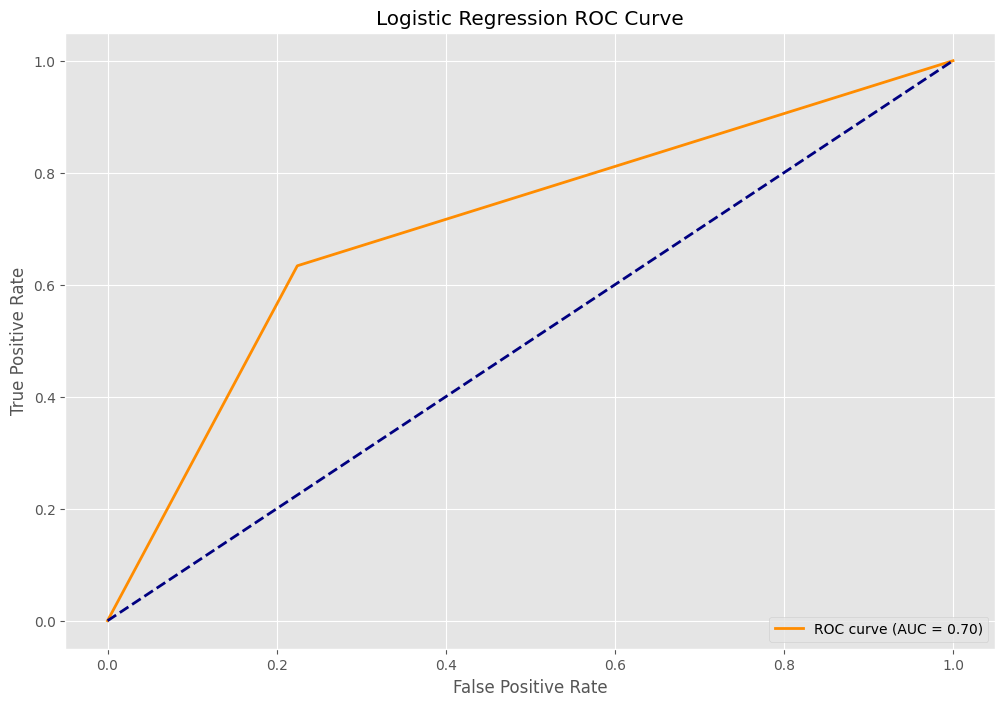

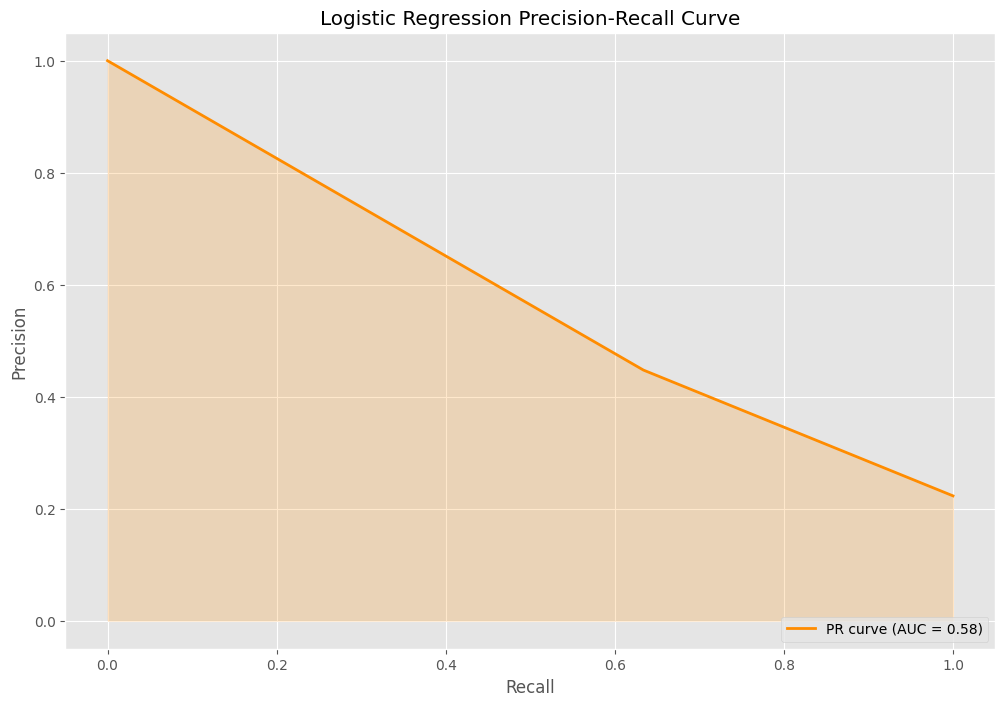

Testing F1 score 0.5246720799500312
Testing recall score 0.6338028169014085
Testing precision score 0.44760213143872113
Testing Accuracy Score 0.743943472409152
Testing specificity score 0.7755484988452656
Testing ROC_AUC score 0.7046756578733371
None
MODEL'S RUNTIME :  10.639916896820068


 Performance of the model for Learning Rate :  0.001
Solving using GD


  1%|          | 99/10000 [00:00<00:43, 227.67it/s]<ipython-input-680-1bb1a44e5510>:21: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
  3%|▎         | 340/10000 [00:01<00:44, 217.09it/s]


model stopped learning
Training F1 score 0.8109982359024271
Training recall score 0.7540723981900452
Training precision score 0.8772206869324911
Training Accuracy Score 0.8242647058823529
Training specificity score 0.8944570135746607
Training ROC_AUC score 0.8242647058823529
------------------------------------------------------


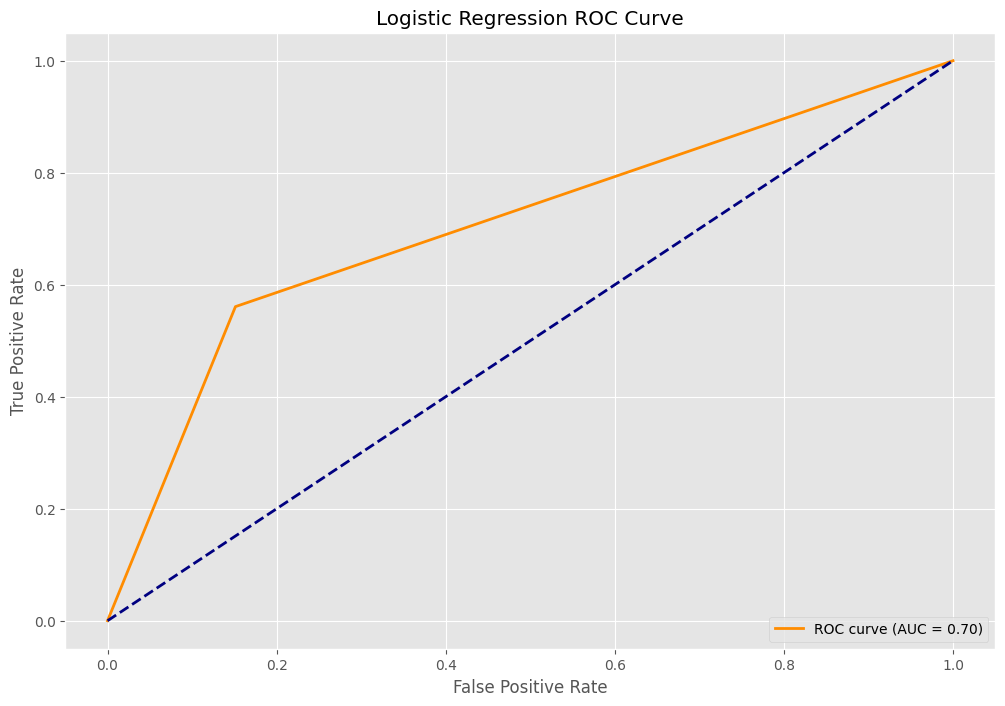

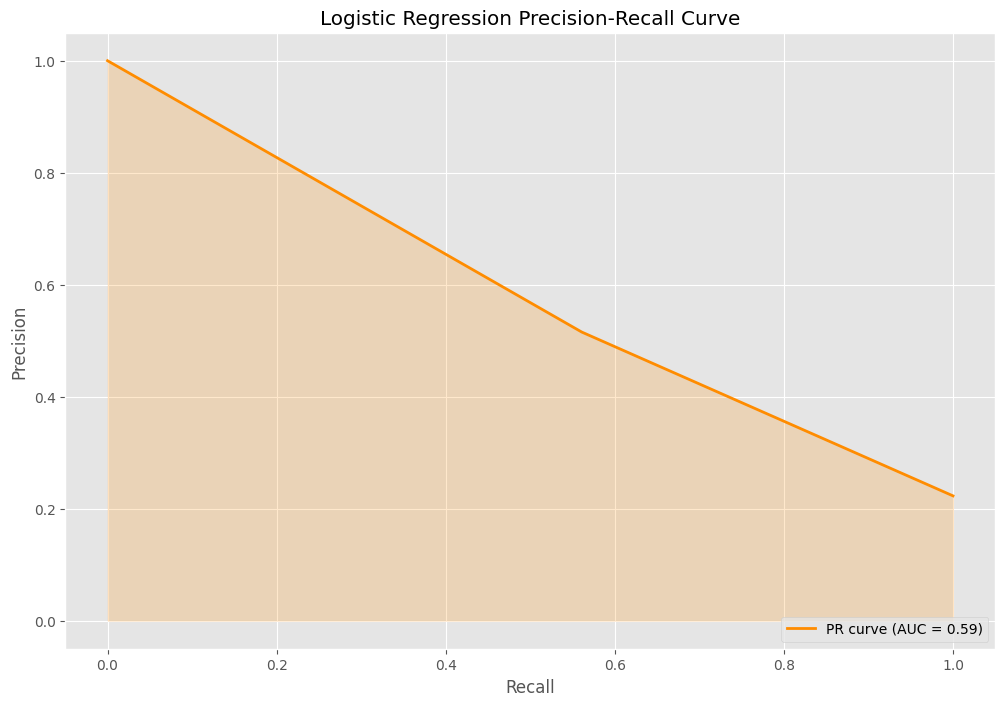

Testing F1 score 0.5372199470007227
Testing recall score 0.5608651911468813
Testing precision score 0.5154877484974573
Testing Accuracy Score 0.7845446388515029
Testing specificity score 0.848729792147806
Testing ROC_AUC score 0.7047974916473436
None
MODEL'S RUNTIME :  11.848485231399536


In [ ]:
# With feature selection
l_r = [0.0003, 0.0005, 0.0007, 0.0008, 0.001]
for i in l_r:
  log_reg = LogisticRegression(X, y, tolerance = 0.0005, learningRate= i, maxIteration=10000)
  print("\n\n Performance of the model for Learning Rate : ", i)
  start = time.time()
  print(log_reg.fit())
  print("MODEL'S RUNTIME : ", time.time() - start)

Without feature selection

In [ ]:
class LogisticRegression:
    
  def __init__(self,X, y, learningRate, tolerance, maxIteration) -> None:
    self.X = X
    self.X = X
    self.tolerance = tolerance
    self.learningRate = learningRate
    self.maxIteration = maxIteration
  

  def add_X0(self, X):                                         
    return np.column_stack([np.ones([X.shape[0], 1]), X])

  def sigmoid(self, z):
    sig = 1/(1+np.exp(-z))
    return sig

  def costFunction(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    # approach1
    cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
    cost = -cost/X.shape[0]
    # approach2
    #cost = (np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))-X.dot(self.w).dot(y)))
    #cost = cost.sum()
    return cost
  
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    gradient = (sig-y).dot(X)
    return gradient
  
  def gradientDescent(self, X, y):
    errors = []
    last_error = float('inf')
    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X, y)
      current_error = self.costFunction(X, y)
      diff = last_error - current_error
      last_error = current_error
      errors.append(current_error)

      if np.abs(diff) < self.tolerance:
        print('model stopped learning')
        break
    return
  
  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)               


  def evaluate(self, y, y_hat):
    y1 = (y==1)
    y1_hat = (y_hat == 1)                
    recall = (y1 & y1_hat).sum()/y1.sum()
    precision = (y1 & y1_hat).sum()/y1_hat.sum()
    f_score = 2*(precision*recall)/(precision+recall)
    accuracy = np.sum(y1 == y1_hat)/len(y1)
    
    y2 = (y==0)
    y2_hat = (y_hat == 0)                
    specificity = (y2 & y2_hat).sum()/y2.sum()
    #accuracy = np.sum(y2 == y2_hat)/len(y2)
    ROC_AUC = 0.5*(recall + specificity)
    
    return f_score, recall, precision, accuracy, specificity, ROC_AUC

  
  def fit(self):
    
    X_train, X_test, y_train, y_test = a.datafit(X,y)
    
    # # with Feature importance
    # X_train = X_train[lr.get_feature_names_out()]
    # X_test = X_test[lr.get_feature_names_out()]

    X_train = self.add_X0(X_train)
    X_test = self.add_X0(X_test)
    print('Solving using GD')
    self.w = np.ones(X_train.shape[1], dtype=np.float64)*0
    self.gradientDescent(X_train, y_train)
    # print(self.w)   # to check the values of gradients
    y_train_hat = self.predict(X_train)
    f_score1, recall1, precision1, accuracy1, specificity1, ROC_AUC1 = self.evaluate(y_train, y_train_hat)
    print('Training F1 score {}'.format(f_score1))
    print('Training recall score {}'.format(recall1))
    print('Training precision score {}'.format(precision1))
    print('Training Accuracy Score {}'.format(accuracy1))
    print('Training specificity score {}'.format(specificity1))
    print('Training ROC_AUC score {}'.format(ROC_AUC1))
    print('------------------------------------------------------')
    y_test_hat = self.predict(X_test)
    #y_test = np.array(y_test)
    f_score2, recall2, precision2, accuracy2, specificity2, ROC_AUC2 = self.evaluate(y_test, y_test_hat)
    self.plot_roc_curve(y_test, y_test_hat)
    self.plot_precision_recall_curve(y_test, y_test_hat)
    print('Testing F1 score {}'.format(f_score2))
    print('Testing recall score {}'.format(recall2))
    print('Testing precision score {}'.format(precision2))
    print('Testing Accuracy Score {}'.format(accuracy2))
    print('Testing specificity score {}'.format(specificity2))
    print('Testing ROC_AUC score {}'.format(ROC_AUC2))
  
  def plot_roc_curve(self, y_train, y_pred):
        fpr, tpr, thresholds = roc_curve(y_train, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Logistic Regression ROC Curve')
        plt.legend(loc="lower right")
        plt.show()   

  def plot_precision_recall_curve(self, y_train, y_pred):
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
        plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Logistic Regression Precision-Recall Curve')
        plt.legend(loc="lower right")
        plt.show() 

  def plot_error(self, error_sequence):        

    # Data for plotting
    s = np.array(error_sequence)
    t = np.arange(s.size)

    fig, ax = plt.subplots()
    ax.plot(t, s,label='alpha')

    #ax.set(xlabel='iterations', ylabel=self.error,
    #       title='{} trend'.format(self.error))
    ax.grid()

    plt.legend(bbox_to_anchor=(1.05,1),loc=2, shadow=True)
    plt.xlabel('iterations')
    plt.ylabel('Cost Function')
    plt.show()  



 Performance of the model for Learning Rate :  0.0003
Solving using GD


 62%|██████▏   | 6195/10000 [00:44<00:20, 186.40it/s]<ipython-input-682-eb97ef5afcec>:21: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
100%|██████████| 10000/10000 [01:07<00:00, 147.08it/s]


Training F1 score 0.769359510782105
Training recall score 0.6760180995475114
Training precision score 0.8926064227035101
Training Accuracy Score 0.7973416289592761
Training specificity score 0.9186651583710407
Training ROC_AUC score 0.7973416289592761
------------------------------------------------------


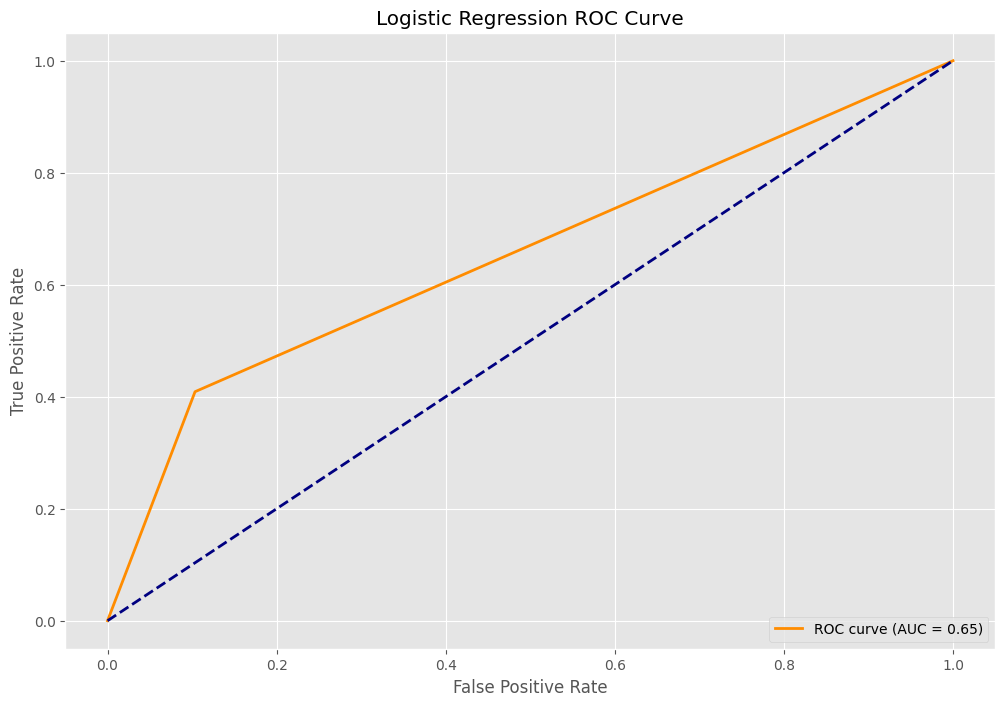

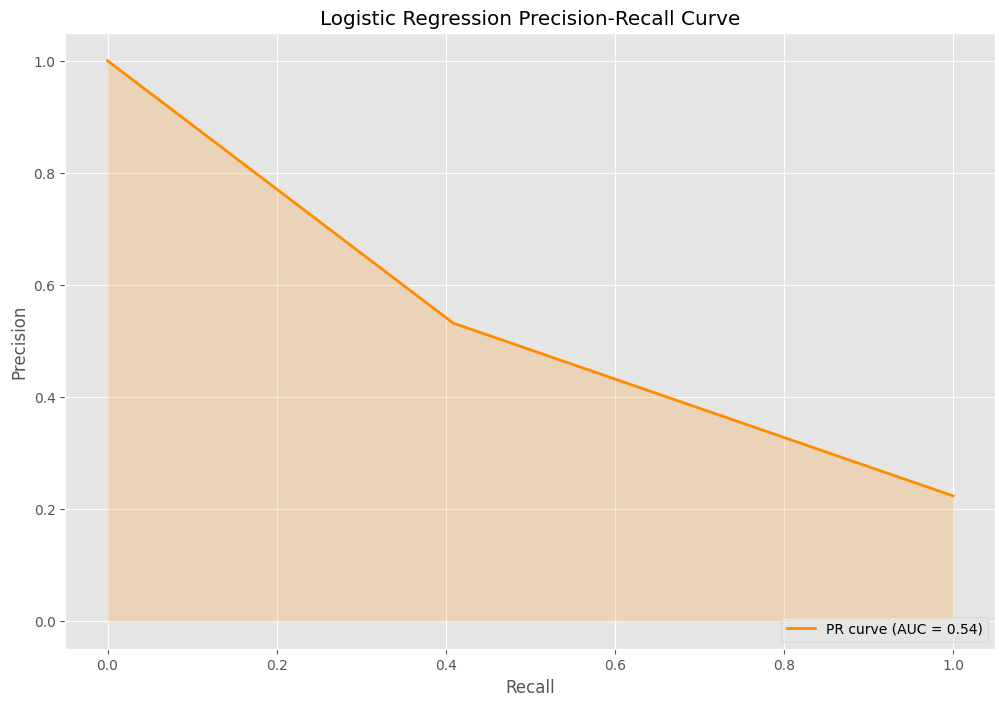

Testing F1 score 0.46219442865264354
Testing recall score 0.408953722334004
Testing precision score 0.5313725490196078
Testing Accuracy Score 0.7877972184836249
Testing specificity score 0.8965069284064665
Testing ROC_AUC score 0.6527303253702352
None
MODEL'S RUNTIME :  79.46871757507324


 Performance of the model for Learning Rate :  0.0005
Solving using GD


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-682-eb97ef5afcec>:21: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
100%|██████████| 10000/10000 [01:09<00:00, 143.02it/s]


Training F1 score 0.7622934501294047
Training recall score 0.866289592760181
Training precision score 0.6805901173124778
Training Accuracy Score 0.7298642533936651
Training specificity score 0.5934389140271493
Training ROC_AUC score 0.7298642533936652
------------------------------------------------------


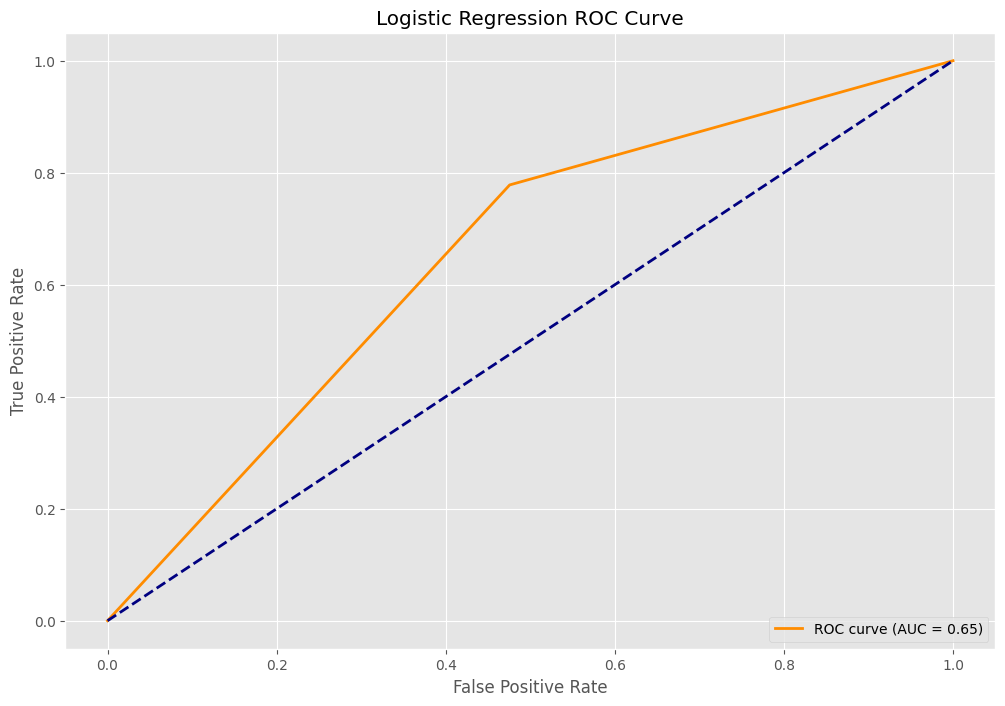

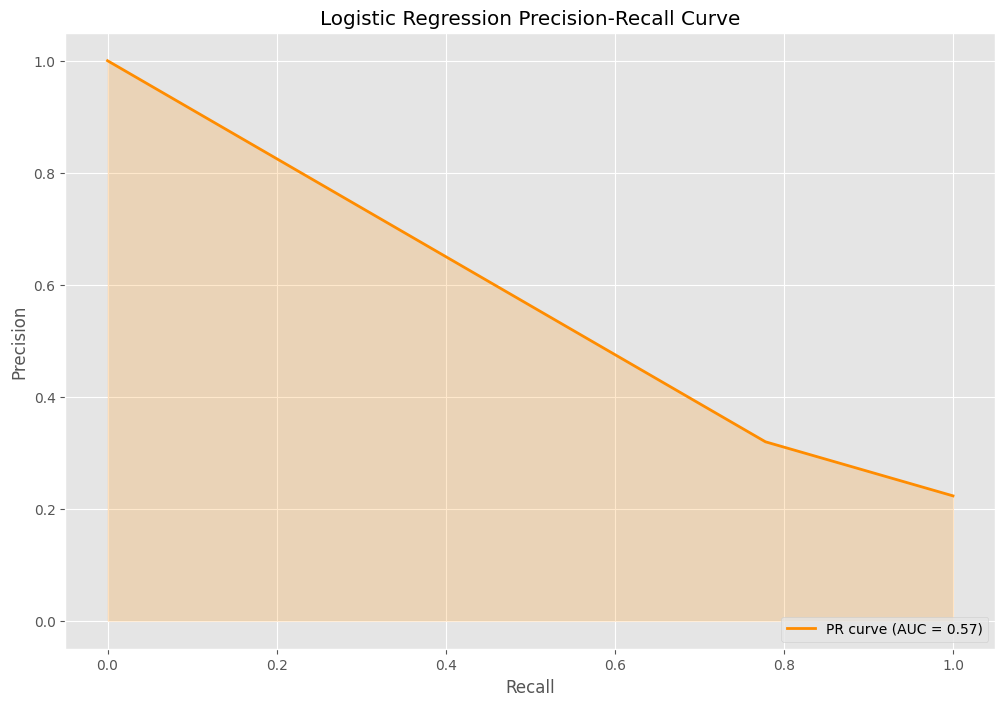

Testing F1 score 0.45300146412884335
Testing recall score 0.778169014084507
Testing precision score 0.3194960760016522
Testing Accuracy Score 0.5809780170480036
Testing specificity score 0.5243937644341802
Testing ROC_AUC score 0.6512813892593436
None
MODEL'S RUNTIME :  80.3638973236084


 Performance of the model for Learning Rate :  0.0007
Solving using GD


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-682-eb97ef5afcec>:21: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
100%|██████████| 10000/10000 [01:09<00:00, 143.79it/s]


Training F1 score 0.7398122022295203
Training recall score 0.9046380090497738
Training precision score 0.6257923155176461
Training Accuracy Score 0.681843891402715
Training specificity score 0.4590497737556561
Training ROC_AUC score 0.681843891402715
------------------------------------------------------


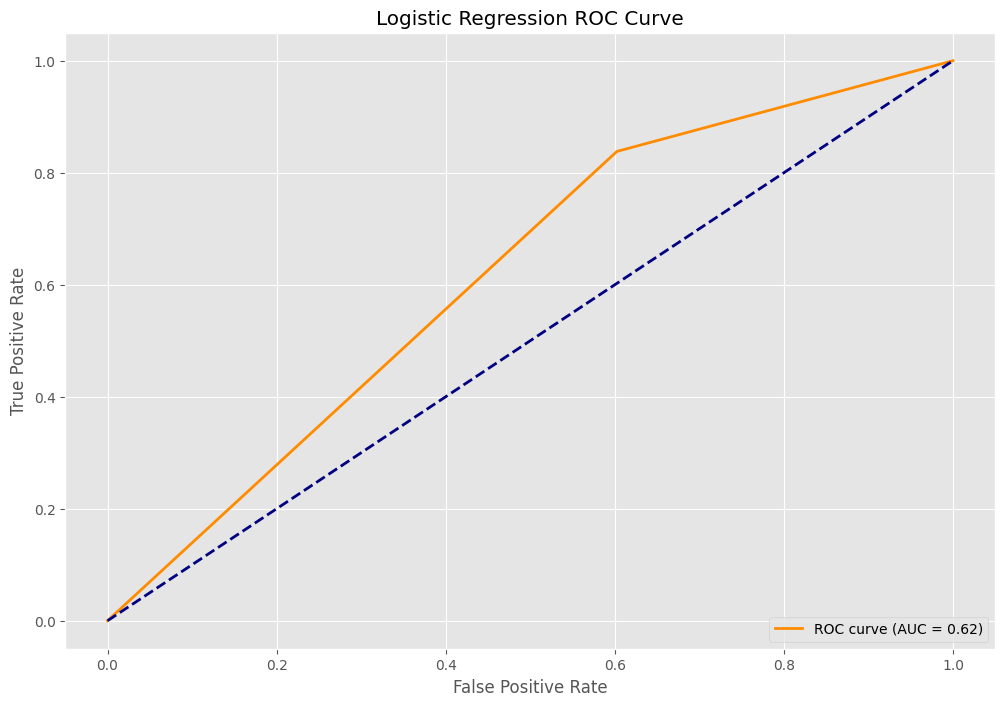

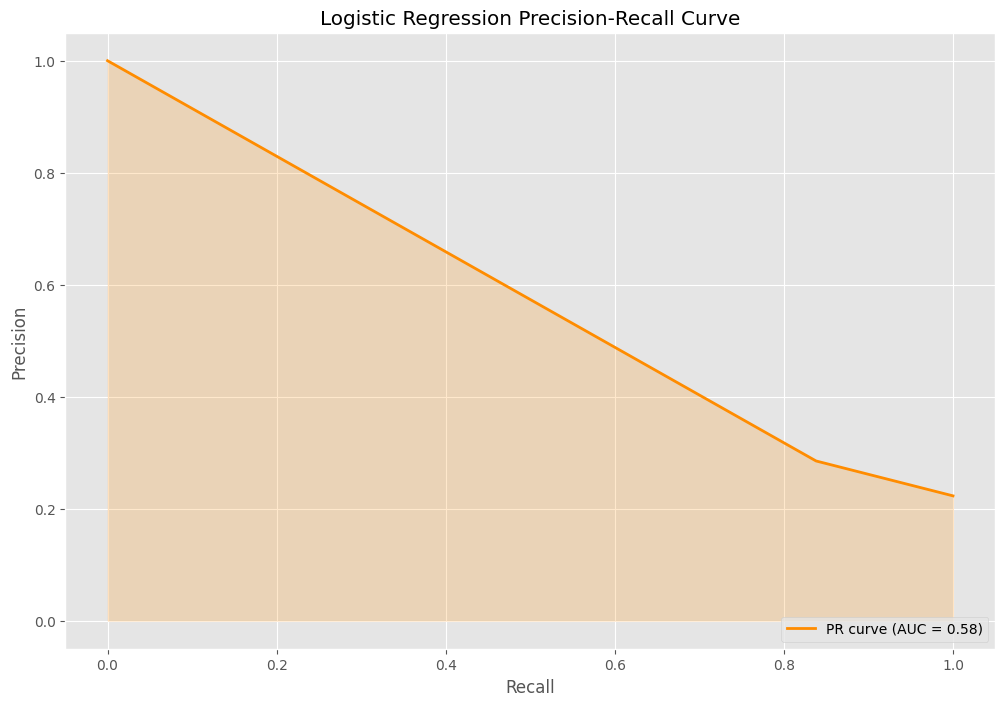

Testing F1 score 0.4256515074092999
Testing recall score 0.8380281690140845
Testing precision score 0.28527397260273973
Testing Accuracy Score 0.49573799910273664
Testing specificity score 0.39751732101616627
Testing ROC_AUC score 0.6177727450151254
None
MODEL'S RUNTIME :  78.57429885864258


 Performance of the model for Learning Rate :  0.0008
Solving using GD


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-682-eb97ef5afcec>:21: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
 95%|█████████▌| 9514/10000 [01:09<00:03, 136.47it/s]


model stopped learning
Training F1 score 0.7810062893081761
Training recall score 0.7023755656108597
Training precision score 0.8794617563739376
Training Accuracy Score 0.803054298642534
Training specificity score 0.9037330316742082
Training ROC_AUC score 0.803054298642534
------------------------------------------------------


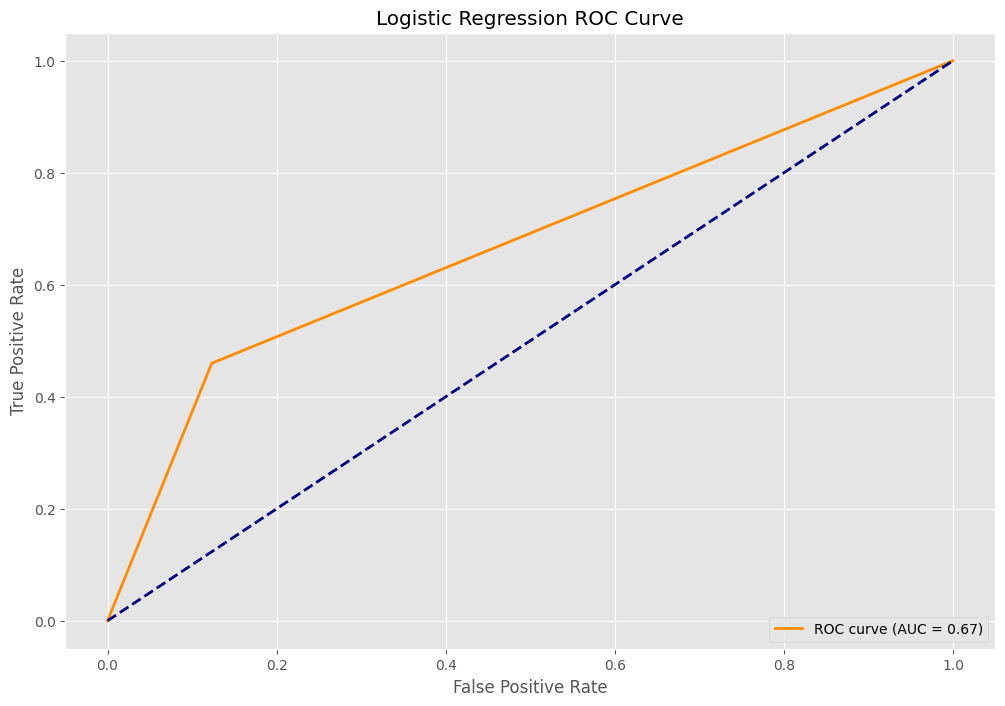

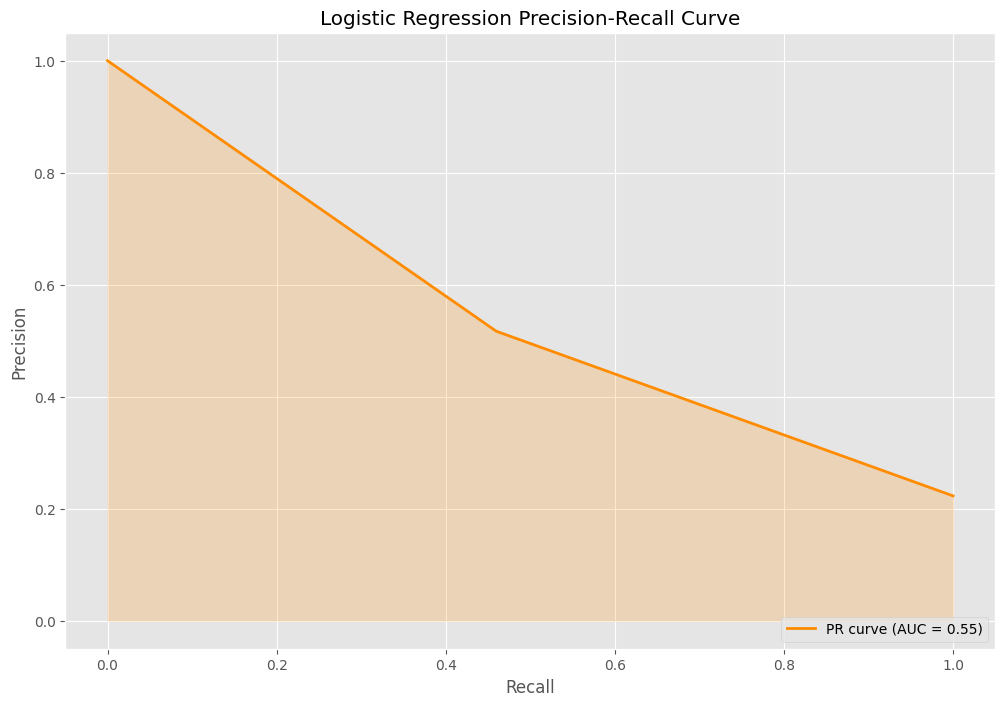

Testing F1 score 0.48668796592119273
Testing recall score 0.4597585513078471
Testing precision score 0.5169683257918553
Testing Accuracy Score 0.7837595334230597
Testing specificity score 0.8767321016166282
Testing ROC_AUC score 0.6682453264622377
None
MODEL'S RUNTIME :  79.08902931213379


 Performance of the model for Learning Rate :  0.001
Solving using GD


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-682-eb97ef5afcec>:21: RuntimeWarning: divide by zero encountered in log
  cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
 21%|██        | 2097/10000 [00:15<00:58, 135.22it/s]


model stopped learning
Training F1 score 0.7768625750913483
Training recall score 0.709502262443439
Training precision score 0.8583550020528261
Training Accuracy Score 0.796210407239819
Training specificity score 0.8829185520361991
Training ROC_AUC score 0.7962104072398191
------------------------------------------------------


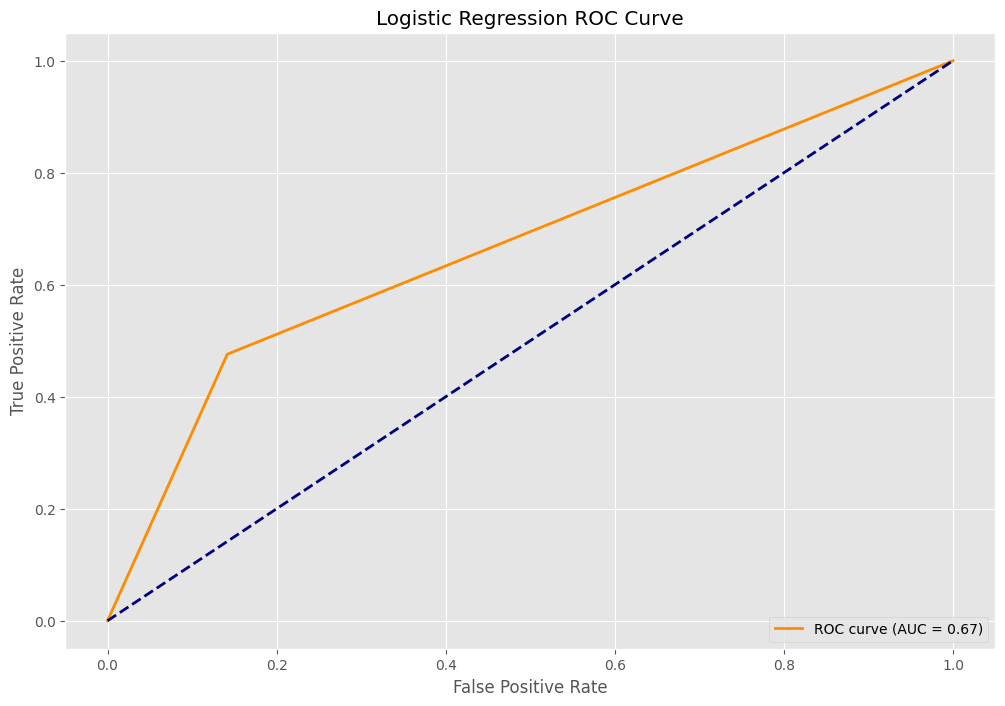

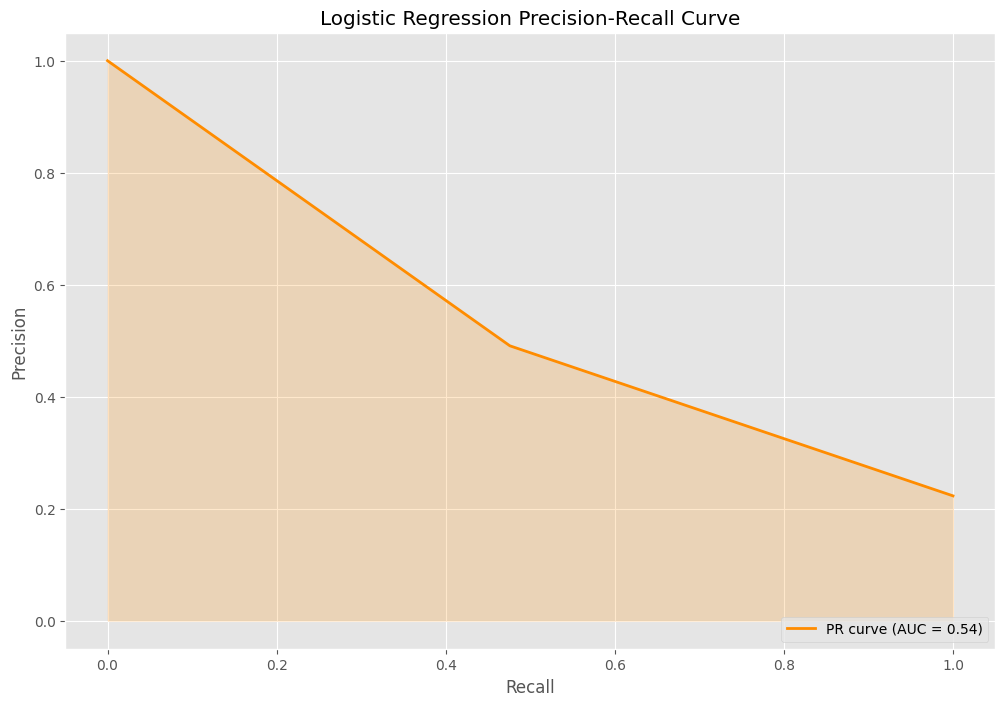

Testing F1 score 0.48326947637292467
Testing recall score 0.47585513078470826
Testing precision score 0.49091852620653864
Testing Accuracy Score 0.7731045311799013
Testing specificity score 0.8584006928406467
Testing ROC_AUC score 0.6671279118126775
None
MODEL'S RUNTIME :  25.609188318252563


In [ ]:
# Without feature selection
l_r = [0.0003, 0.0005, 0.0007, 0.0008, 0.001]
for i in l_r:
  log_reg = LogisticRegression(X, y, tolerance = 0.0005, learningRate= i, maxIteration=10000)
  print("\n\n Performance of the model for Learning Rate : ", i)
  start = time.time()
  print(log_reg.fit())
  print("MODEL'S RUNTIME : ", time.time() - start)

## 2. Naive Bayes model

In [ ]:
class NaiveBayes:
    
    def __init__(self):
        self.prior = None
        self.mean = None
        self.var = None
        self.classes = None
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = a.datafit(X,y)

        # Feature importance
        X_train = X_train[selected_feat]
        X_test = X_test[selected_feat]

        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        
        # Compute prior probability of each class
        self.prior = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.prior[i] = np.sum(y == c) / len(y)
            
        # Compute mean and variance of each feature for each class
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i] = X_c.mean(axis=0)
            self.var[i] = X_c.var(axis=0)

            
        
    def pdf(self, X, class_idx):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(X - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
        
    def predict(self, X):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            posterior = np.sum(np.log(self.pdf(X, i)), axis=1)
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)                    
        recall = (y & y_hat).sum() / y.sum()
        precision = (y & y_hat).sum() / y_hat.sum()
        f_score = 2 * (precision * recall) / (precision + recall)
        accuracy = np.sum(y == y_hat) / len(y)
        return f_score, recall, precision, accuracy
        

    def print_results(self, y_train, y_pred):
        f_score, recall, precision, accuracy = self.evaluate(y_train, y_pred)
        print('F1 score: {:.4f}'.format(f_score))
        print('Recall score: {:.4f}'.format(recall))
        print('Precision score: {:.4f}'.format(precision))
        print('Accuracy score: {:.4f}'.format(accuracy))
        
    def plot_roc_curve(self, y_train, y_pred):
        fpr, tpr, thresholds = roc_curve(y_train, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(' Naive Bayes ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    def plot_precision_recall_curve(self, y_train, y_pred):
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
        plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(' Naive Bayes Precision-Recall Curve')
        plt.legend(loc="lower right")
        plt.show()

    def fit_predict_print(self, X_train, y_train):
        self.fit(X_train, y_train)
        y_pred = self.predict(X_train)
        self.print_results(y_train, y_pred)
        self.plot_roc_curve(y_train, y_pred)
        self.plot_precision_recall_curve(y_train, y_pred)

without feature selection

In [ ]:
nb = NaiveBayes()
start = time.time()
nb.fit(X, y)
print("Model Runtime : ", time.time() - start)

Model Runtime :  10.612642049789429


/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


F1 score: 0.5148
Recall score: 0.6043
Precision score: 0.4484
Accuracy score: 0.7480


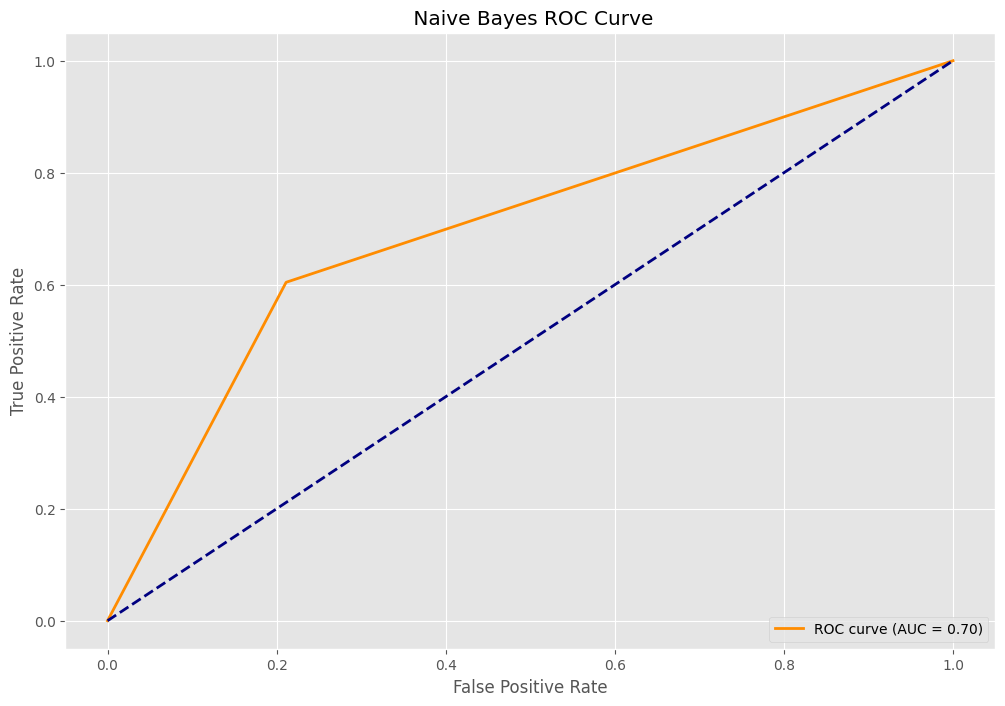

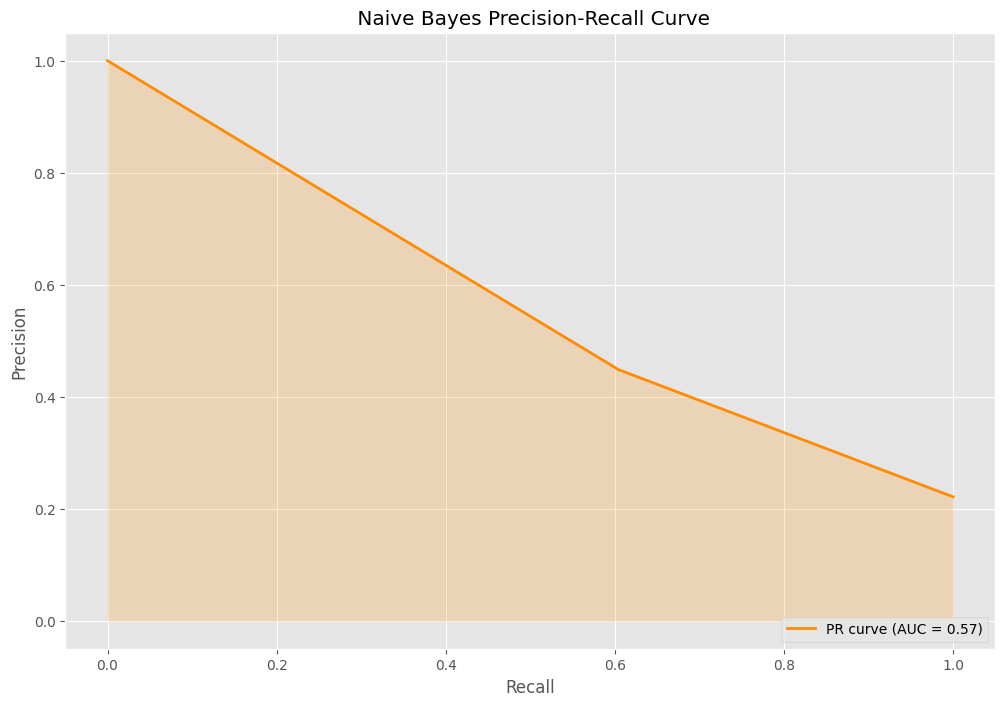

In [ ]:
# fit the classifier to the data and print the evaluation results
nb.fit_predict_print(X, y)

with feature selection

In [ ]:
nb = NaiveBayes()
start = time.time()
nb.fit(X, y)
print("Model Runtime : ", time.time() - start)

Model Runtime :  9.655510187149048


/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


F1 score: 0.5148
Recall score: 0.6043
Precision score: 0.4484
Accuracy score: 0.7480


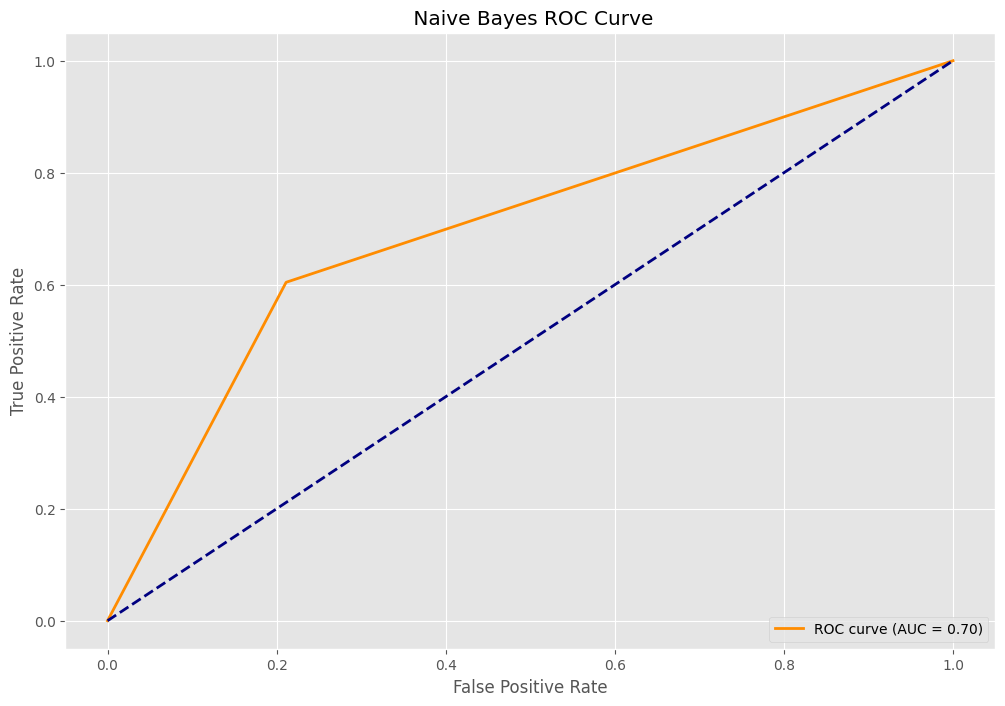

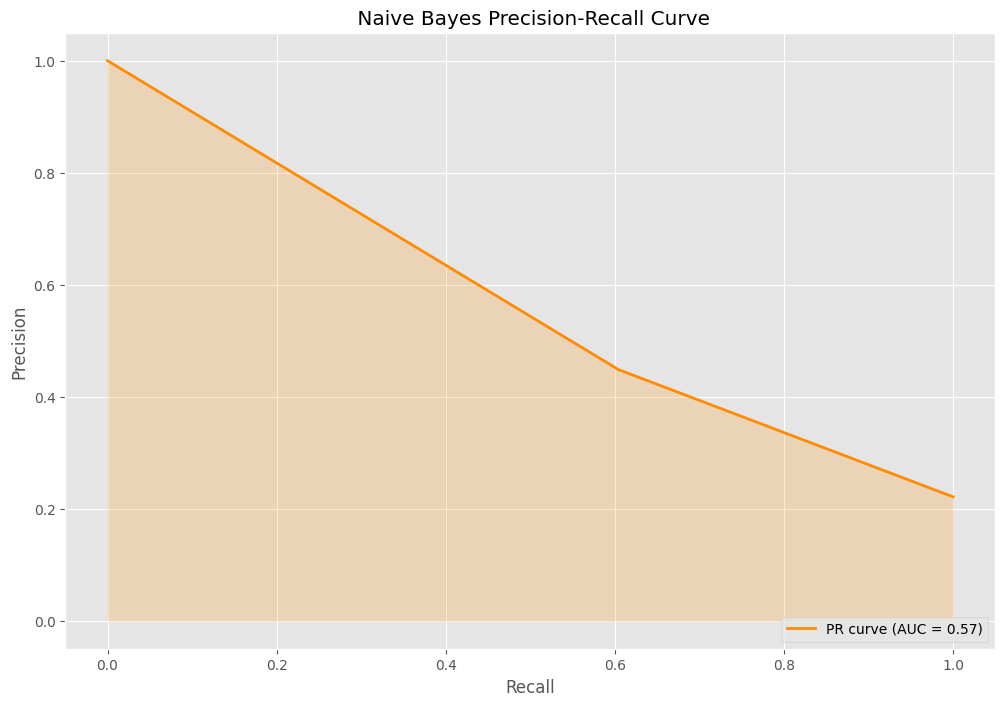

In [ ]:
# fit the classifier to the data and print the evaluation results
nb.fit_predict_print(X, y)

In [ ]:
class NaiveBayes:
    
    def __init__(self):
        self.prior = None
        self.mean = None
        self.var = None
        self.classes = None
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = a.datafit(X,y)

        # Feature importance
        X_train = X_train[selected_feat]
        X_test = X_test[selected_feat]

        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        
        # Compute prior probability of each class
        self.prior = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.prior[i] = np.sum(y == c) / len(y)
            
        # Compute mean and variance of each feature for each class
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i] = X_c.mean(axis=0)
            self.var[i] = X_c.var(axis=0)
        return X_train, X_test, y_train, y_test


    def pdf(self, X, class_idx):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(X - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
        
    def predict(self, X):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            posterior = np.sum(np.log(self.pdf(X, i)), axis=1)
            posterior = prior + posterior
            posteriors.append(posterior)
            y_hat = posteriors
        return y_hat
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)                    
        recall = (y & y_hat).sum() / y.sum()
        precision = (y & y_hat).sum() / y_hat.sum()
        f_score = 2 * (precision * recall) / (precision + recall)
        accuracy = np.sum(y == y_hat) / len(y)
        return f_score, recall, precision, accuracy
        

    def print_results(self, y_test, y_pred):
        f_score, recall, precision, accuracy = self.evaluate(y_test, y_pred)
        print('F1 score: {:.4f}'.format(f_score))
        print('Recall score: {:.4f}'.format(recall))
        print('Precision score: {:.4f}'.format(precision))
        print('Accuracy score: {:.4f}'.format(accuracy))
        
    def plot_roc_curve(self, y_test, y_pred):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(' Naive Bayes ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    def plot_precision_recall_curve(self, y_test, y_pred):
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
        plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(' Naive Bayes Precision-Recall Curve')
        plt.legend(loc="lower right")
        plt.show()

    def fit_predict_print(self, X, y):
        self.fit(X, y)
        y_pred = self.predict(X_test)
        self.print_results(y_test, y_pred)
        self.plot_roc_curve(y_test, y_pred)
        self.plot_precision_recall_curve(y_test, y_pred)

## 3. SVM

In [ ]:
from scipy.optimize import minimize, Bounds
from dataclasses import dataclass

@dataclass
class SoftMarginSVM:
    C:float
        
    def dualSVM(self, gramXy,alphas):
        return alphas.sum() - 0.5*alphas.dot(alphas.dot(gramXy))
    
    def jacobian_dualSVM(self,gramXy, alphas):
        return np.ones(len(alphas)) - alphas.dot(gramXy)
    
    def fit(self, X, y):
        N, n_features = X.shape
        y_ = np.where(y<=0,-1,1)
        Xy = X * y_[:, np.newaxis]
        gramXy = Xy.dot(Xy.T)
        
        alphas = np.ones(N)
        
        bounds = Bounds(np.zeros(N), np.full(N, self.C ))
        constraints = ({'type': 'eq','fun': lambda a: -np.dot(a, y_), 'jac' : lambda a: -y_})
        
        slsqp = minimize(fun = lambda a : -self.dualSVM(gramXy, a),
                        x0 = alphas,
                        jac = lambda a : -self.jacobian_dualSVM(gramXy, a),
                        bounds = bounds,
                        constraints = constraints,
                        method = 'SLSQP')
        
        self.alphas = slsqp.x
        self.w = np.sum((self.alphas[:,np.newaxis]*Xy), axis = 0)
        epsilon = 1e-6
        
        self.support_vectors = X[self.alphas > epsilon]
        #self.signdist = np.matmul(self.support_vectors,self.w)
        #self.mindist = np.argmin(self.signdist)
        self.support_labels = y_[self.alphas > epsilon]
        
        #self.intercept = self.support_labels[self.mindist] - self.signdist[self.mindist]
        #self.intercept = support_labels[0] - np.matmul(self.support_vectors[0].T, self.w)
        self.intercept = np.mean(self.support_labels - np.matmul(self.support_vectors,self.w))
        
        
    def predict(self, X):
        """ Predict y value in {-1, 1} """
        assert(self.w is not None)
        assert(self.w.shape[0] == X.shape[1])
        y_hat = 2 * ((np.matmul(X, self.w) + self.intercept)  > 0) - 1
        return y_hat
    
    
    def evaluate(self, y, y_hat):
        y1 = (y==1)
        y1_hat = (y_hat == 1)
        recall = (y1 & y1_hat).sum()/y1.sum()
        precision = (y1 & y1_hat).sum()/y1_hat.sum()
        f_score = 2*(precision*recall)/(precision+recall)
        accuracy = np.sum(y1 == y1_hat)/len(y1)

        y2 = (y==0)
        y2_hat = (y_hat == 0)                
        specificity = (y2 & y2_hat).sum()/y2.sum()
        #accuracy = np.sum(y2 == y2_hat)/len(y2)
        ROC_AUC = 0.5*(recall + specificity)

        return f_score, recall, precision, accuracy, specificity, ROC_AUC

    def print_results(self, y_train, y_pred):
        f_score, recall, precision, accuracy, specificity, ROC_AUC = self.evaluate(y_train, y_pred)
        print('F1 score: {:.4f}'.format(f_score))
        print('Recall score: {:.4f}'.format(recall))
        print('Precision score: {:.4f}'.format(precision))
        print('Accuracy score: {:.4f}'.format(accuracy))
       

      
    def plot_roc_curve(self, y_train, y_pred):
        fpr, tpr, thresholds = roc_curve(y_train, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    def plot_precision_recall_curve(self, y_train, y_pred):
        precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
        plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower right")
        plt.show()
    
    def fit_predict_print(self, X, y):
        y_pred = self.predict(X)
        self.print_results(y, y_pred)
        self.plot_roc_curve(y, y_pred)
        self.plot_precision_recall_curve(y, y_pred)
        

In [ ]:
df_sample = crd_df.sample(frac=0.05, random_state=42)

In [ ]:
crd_df.shape

(29720, 87)

In [ ]:
#taking our target variable and storing it in y or output set
y_s = df_sample['IsDefault']
#consecutively, dropping the target variable or input set
X_s = df_sample.drop('IsDefault',axis=1)

In [ ]:
s=Preprocessing(X_s,y_s)

X_train_s, X_test_s, y_train_s, y_test_s = s.datafit(X_s,y_s)

In [ ]:
SVR = SoftMarginSVM(C = 1)
start = time.time()
SVR.fit(X_train_s, y_train_s)
print("Model Runtime : ", time.time() - start)

Model Runtime :  290.2576184272766


F1 score: 0.4831
Recall score: 0.5208
Precision score: 0.4505
Accuracy score: 0.7601


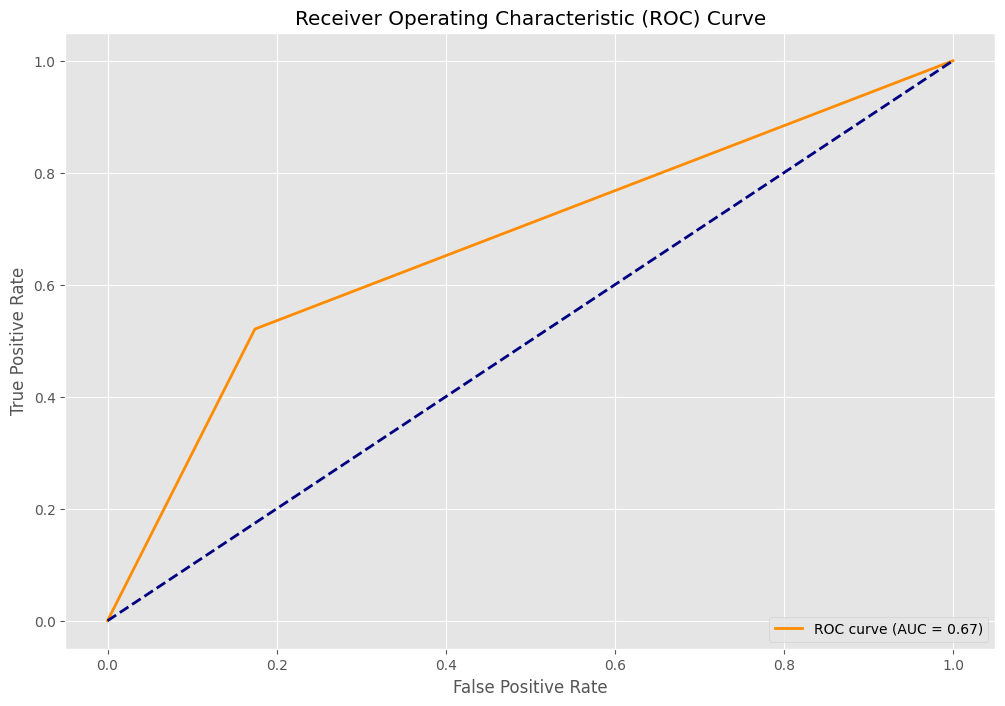

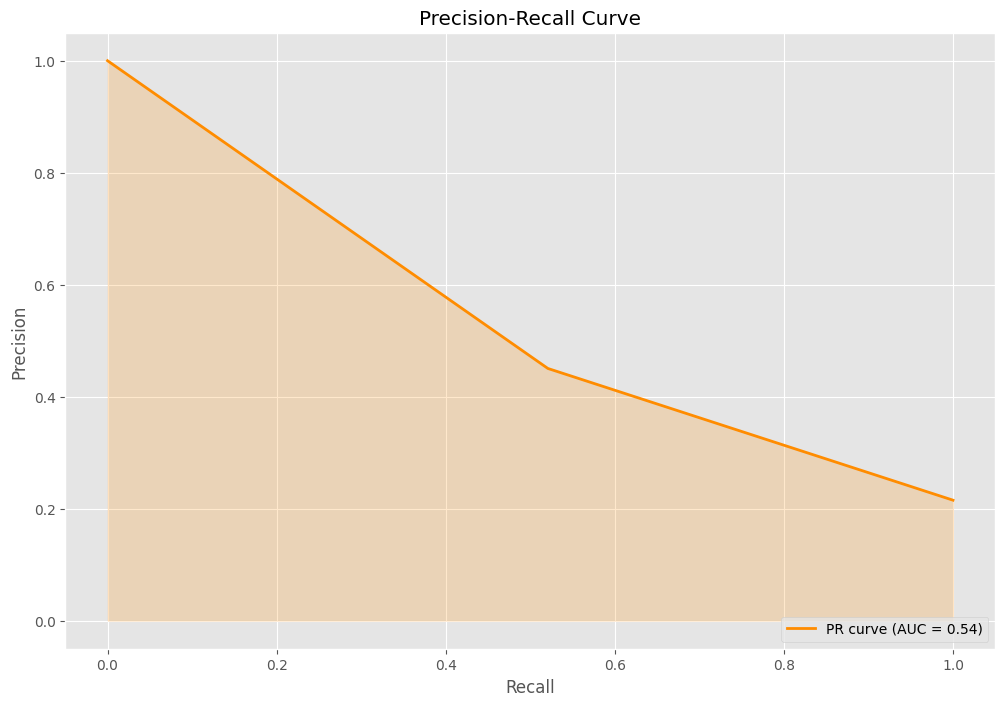

In [ ]:
SVR.fit_predict_print(X_test_s, y_test_s)

## 4. Decision Tree

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value


class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
   
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: 
            return tree.value
        feature_val = x[tree.feature_index]
        
        
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        
        
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

without feature selection

In [ ]:
start = time.time()
y_train = np.array(y_train).reshape(-1,1)
classifier = DecisionTreeClassifier()
classifier.fit(X_train[:5000], y_train[:5000])
classifier.print_tree()
print("Model Runtime : ", time.time() - start)

X_26 <= 0 ? 0.0427992128442648
 left:X_37 <= 0 ? 0.0164320276025528
  left:X_59 <= 0 ? 0.006302570710939481
    left:0
    right:0
  right:X_27 <= 0 ? 0.01792756232194348
    left:0
    right:1
 right:X_3 <= 566 ? 0.008416129683058882
  left:X_6 <= 2528 ? 0.22541743970315403
    left:0
    right:1
  right:X_2 <= 40 ? 0.009521261884194776
    left:1
    right:1
Model Runtime :  677.9616191387177


In [ ]:
X_test = np.array(X_test)

In [ ]:
preds = classifier.predict(X_test)

In [ ]:
fp = 0
fn = 0

tp = 0
tn = 0

for actual_value, predicted_value in zip(y_test, preds):
    # let's first see if it's a true (t) or false prediction (f)
    if predicted_value == actual_value: # t?
        if predicted_value == 1: # tp
            tp += 1
        else: # tn
            tn += 1
    else: # f?
        if predicted_value == 1: # fp
            fp += 1
        else: # fn
            fn += 1
            
our_confusion_matrix = [
    [tn, fp],
    [fn, tp]
]
# we convert it to numpy array to be printed properly as a matrix

our_confusion_matrix = np.array(our_confusion_matrix)
our_confusion_matrix

array([[6521,  407],
       [1382,  606]])

In [ ]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
final_recall = tp / ( tp + fn )
final_recall

0.30482897384305835

In [ ]:
final_precision = tp / ( tp + fp )
final_precision

0.5982230997038499

In [ ]:
f1_score = 2 * ((final_precision * final_recall) / (final_precision + final_recall))
f1_score

0.40386537820726426

In [ ]:
accuracy = (tp + tn)/( tp + tn + fp +fn )
accuracy

0.7993494840735756

with feature selection

In [ ]:
start = time.time()
y_train = np.array(y_train).reshape(-1,1)
classifier = DecisionTreeClassifier()
classifier.fit(X_train[selected_feat][:5000], y_train[:5000])
classifier.print_tree()
print("Model Runtime : ", time.time() - start)

X_15 <= 0 ? 0.0427992128442648
 left:X_16 <= 0 ? 0.0164320276025528
  left:X_8 <= 552 ? 0.005701616646070662
    left:0
    right:0
  right:X_0 <= 40000 ? 0.01500149125516459
    left:1
    right:0
 right:X_2 <= 566 ? 0.008416129683058882
  left:X_5 <= 2528 ? 0.22541743970315403
    left:0
    right:1
  right:X_1 <= 40 ? 0.009521261884194776
    left:1
    right:1
Model Runtime :  581.3979098796844


In [ ]:
X_test = np.array(X_test[selected_feat])

In [ ]:
preds = classifier.predict(X_test)

In [ ]:
fp = 0
fn = 0

tp = 0
tn = 0

for actual_value, predicted_value in zip(y_test, preds):
    # let's first see if it's a true (t) or false prediction (f)
    if predicted_value == actual_value: # t?
        if predicted_value == 1: # tp
            tp += 1
        else: # tn
            tn += 1
    else: # f?
        if predicted_value == 1: # fp
            fp += 1
        else: # fn
            fn += 1
            
our_confusion_matrix = [
    [tn, fp],
    [fn, tp]
]
# we convert it to numpy array to be printed properly as a matrix

our_confusion_matrix = np.array(our_confusion_matrix)
our_confusion_matrix

array([[6616,  312],
       [1309,  679]])

In [ ]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
final_recall = tp / ( tp + fn )
final_recall

0.3415492957746479

In [ ]:
final_precision = tp / ( tp + fp )
final_precision

0.6851664984863775

In [ ]:
f1_score = 2 * ((final_precision * final_recall) / (final_precision + final_recall))
f1_score

0.455857670359181

In [ ]:
accuracy = (tp + tn)/( tp + tn + fp +fn )
accuracy

0.8181920143562136

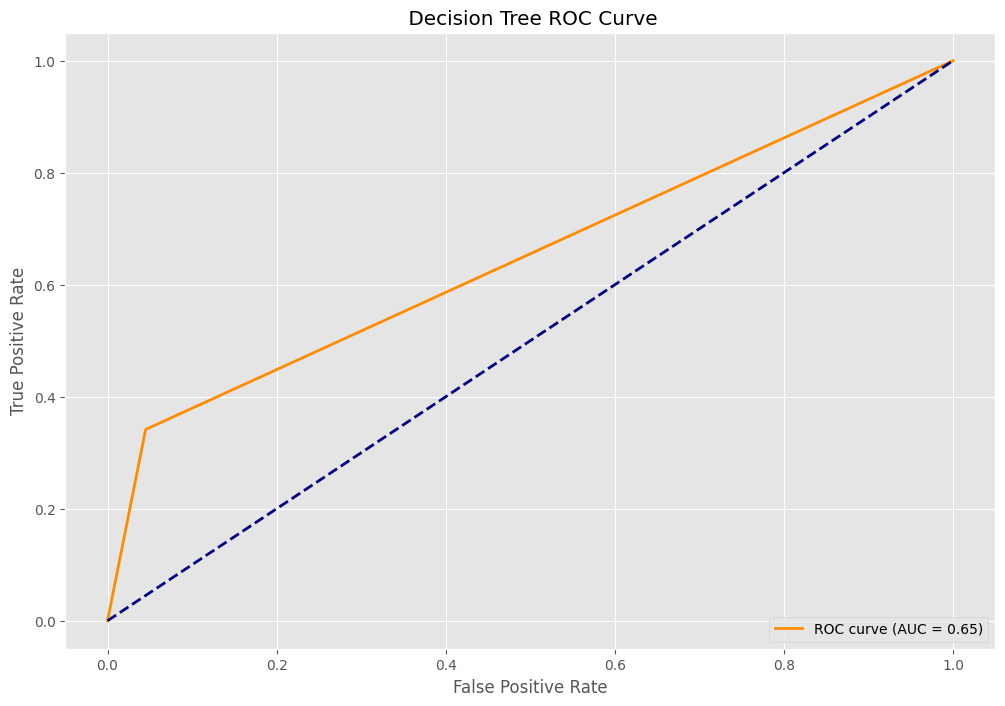

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

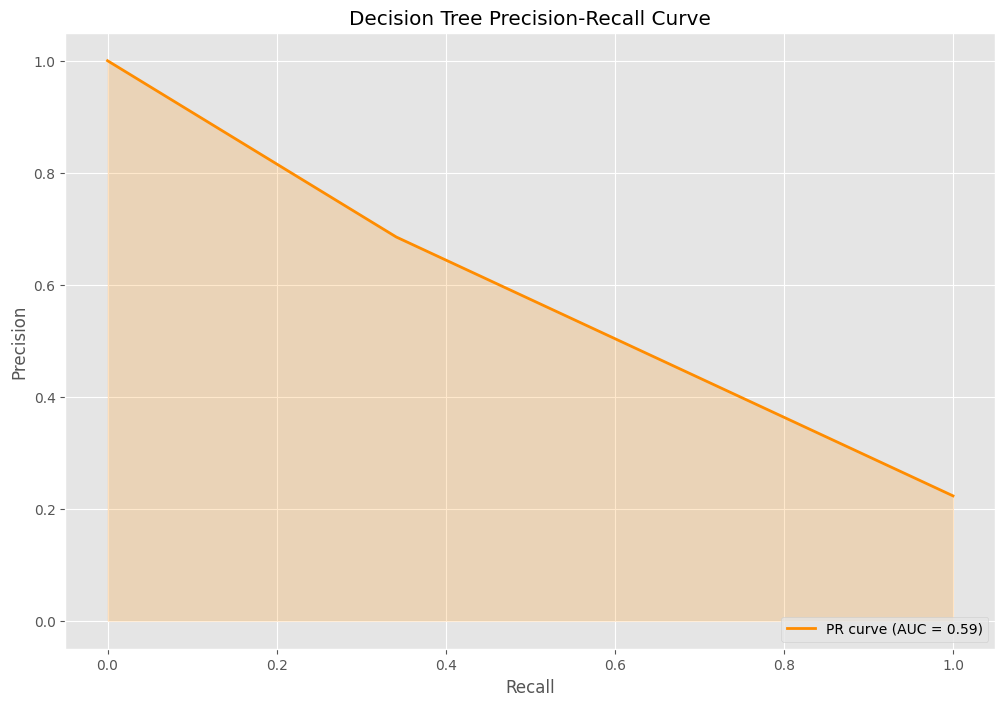

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## 5. Neural Network

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
X=np.asarray(X).astype(np.int)
y=np.asarray(y).astype(np.int)

def build_model(hp):
  model = models.Sequential([
      layers.Dense(units = hp.Int('dense_1', min_value=32, max_value=256, step=16), input_dim = 85, 
                   activation = hp.Choice('dense_1_activation', values = ['relu', 'tanh'])),
      layers.Dense(units = hp.Int('dense_2', min_value=64, max_value=256, step=16), 
                   activation = hp.Choice('dense_2_activation', values = ['relu', 'tanh'])),
      layers.Dense(units = hp.Int('dense_3', min_value=128, max_value=256, step=16), 
                   activation = hp.Choice('dense_3_activation', values = ['relu', 'tanh'])),
      layers.Dense(2, activation='softmax')
  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
  return model

<ipython-input-448-3ed716aa5ade>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.asarray(X).astype(np.int)
<ipython-input-448-3ed716aa5ade>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for m

In [ ]:
tuner_search = RandomSearch(build_model, 
                            objective='val_accuracy', 
                            max_trials=5, 
                            directory='output', 
                            project_name='Testing')

In [ ]:
X_train, X_test, y_train, y_test = a.datafit(X,y)

In [ ]:
tuner_search.search(X_train, y_train, epochs=50, validation_split=0.15)

Trial 5 Complete [00h 02m 59s]
val_accuracy: 0.9266666769981384

Best val_accuracy So Far: 0.9266666769981384
Total elapsed time: 00h 05m 23s


In [ ]:
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               22016     
                                                                 
 dense_1 (Dense)             (None, 240)               61680     
                                                                 
 dense_2 (Dense)             (None, 240)               57840     
                                                                 
 dense_3 (Dense)             (None, 2)                 482       
                                                                 
Total params: 142,018
Trainable params: 142,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)
start = time.time()
print(model.fit(X, y, epochs=50, validation_split=0.15))
print("Model Runtime : ", time.time() - start)

Epoch 1/50
790/790 [==============================] - 6s 7ms/step - loss: 0.3910 - accuracy: 0.8378 - val_loss: 0.4947 - val_accuracy: 0.8120
Epoch 2/50
790/790 [==============================] - 4s 5ms/step - loss: 0.3886 - accuracy: 0.8385 - val_loss: 0.4878 - val_accuracy: 0.8069
Epoch 3/50
790/790 [==============================] - 5s 6ms/step - loss: 0.3812 - accuracy: 0.8407 - val_loss: 0.5010 - val_accuracy: 0.8102
Epoch 4/50
790/790 [==============================] - 5s 6ms/step - loss: 0.3778 - accuracy: 0.8436 - val_loss: 0.5027 - val_accuracy: 0.8069
Epoch 5/50
790/790 [==============================] - 4s 5ms/step - loss: 0.3701 - accuracy: 0.8460 - val_loss: 0.5276 - val_accuracy: 0.8122
Epoch 6/50
790/790 [==============================] - 4s 6ms/step - loss: 0.3665 - accuracy: 0.8482 - val_loss: 0.5211 - val_accuracy: 0.8046
Epoch 7/50
790/790 [==============================] - 5s 6ms/step - loss: 0.3620 - accuracy: 0.8504 - val_loss: 0.5404 - val_accuracy: 0.8107
Epoch 

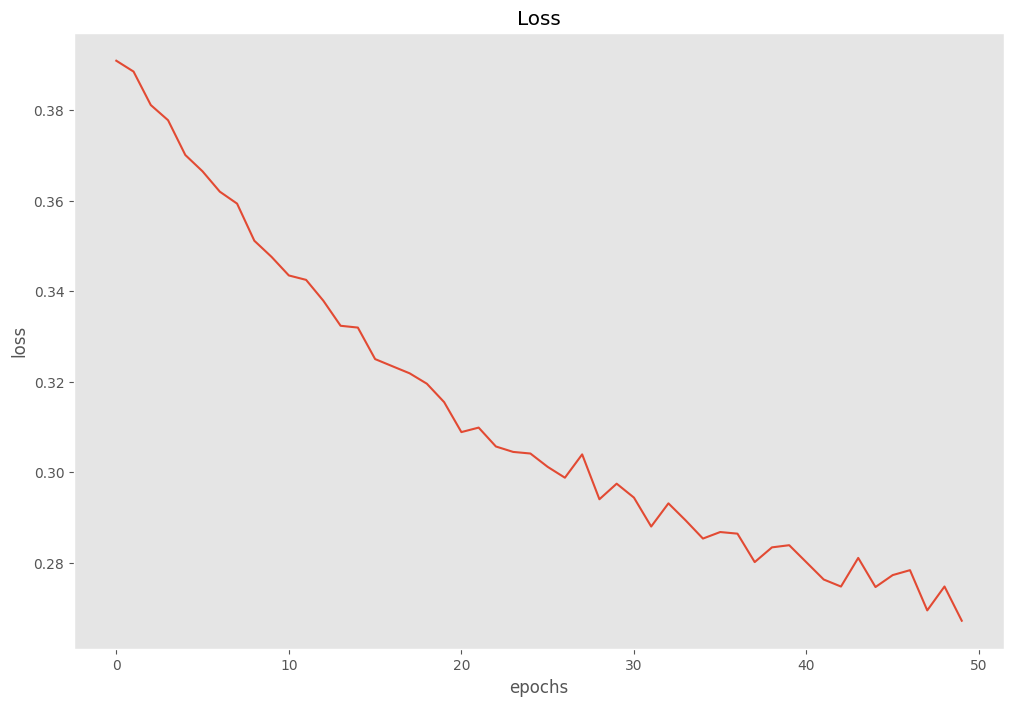

In [ ]:
loss = model.history.history['loss']
def plot(loss):
  axis = list(range(0, len(loss), 1))
  fig, ax = plt.subplots()
  ax.plot(axis, loss)
  ax.set_title('Loss')
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  ax.grid()
  plt.show()
plot(loss)

In [ ]:
fp = 0
fn = 0

tp = 0
tn = 0

for actual_value, predicted_value in zip(y_test, preds):
      # let's first see if it's a true (t) or false prediction (f)
    if predicted_value == actual_value: # t?
        if predicted_value == 1: # tp
            tp += 1
        else: # tn
              tn += 1
    else: # f?
        if predicted_value == 1: # fp
            fp += 1
        else: # fn
            fn += 1
              
our_confusion_matrix = [
      [tn, fp],
      [fn, tp]
]
  # we convert it to numpy array to be printed properly as a matrix

our_confusion_matrix = np.array(our_confusion_matrix)
final_recall = tp / ( tp + fn )
final_precision = tp / ( tp + fp )
f1_score = 2 * ((final_precision * final_recall) / (final_precision + final_recall))
accuracy = (tp + tn)/( tp + tn + fp +fn )

In [ ]:
y_pred = model.predict(X_test)
print("Recall : ", final_recall)
print("Precision : ", final_precision)
print("f1 Score : ", f1_score)
print("Accuracy : ", accuracy)


279/279 [==============================] - 1s 5ms/step
Recall :  0.3415492957746479
Precision :  0.6851664984863775
f1 Score :  0.455857670359181
Accuracy :  0.8181920143562136


# Extra models

In [ ]:
def evaluate(y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)                    
    recall = (y & y_hat).sum() / y.sum()
    precision = (y & y_hat).sum() / y_hat.sum()
    f_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(y == y_hat) / len(y)
    return f_score, recall, precision, accuracy
    
def print_results(self, y_train, y_pred):
    f_score, recall, precision, accuracy = self.evaluate(y_train, y_pred)
    print('Training F1 score: {:.4f}'.format(f_score))
    print('Training recall score: {:.4f}'.format(recall))
    print('Training precision score: {:.4f}'.format(precision))
    print('Accuracy score: {:.4f}'.format(accuracy))
        
def plot_roc_curve(self, y_train, y_pred):
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(self, y_train, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
    plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

def fit_predict_print(self, X_train, y_train):
    self.fit(X_train, y_train)
    y_pred = self.predict(X_train)
    self.print_results(y_train, y_pred)
    self.plot_roc_curve(y_train, y_pred)
    self.plot_precision_recall_curve(y_train, y_pred)

## SVM - Kernel function

In [ ]:
from scipy.optimize import minimize, Bounds
from dataclasses import dataclass

#@dataclass
class KernelSoftMarginSVM:
    #C:float
    
    def __init__(self,C,kernel):
        self.C = C                               
        self.kernel = kernel          # <---
        self.alphas = None
        self.supportVectors = None
        
    
    
    def fit(self, X, y):
        N, n_features = X.shape
        y_ = np.where(y<=0,-1,1)
        y_ = np.array(y_)
        yp = np.array(y_).reshape(-1, 1)
        # --->
        # Gram matrix of h(x) y
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)   
        GramHXy = hXX * np.matmul(yp, yp.T) 
        # <---
     
       # Lagrange dual problem
        def dualSVM(G,alphas):
            return alphas.sum() - 0.5*alphas.dot(alphas.dot(G))
    
        def jacobian_dualSVM(G, alphas):
            return np.ones_like(alphas) - alphas.dot(G)
        
        
        alphas = np.ones(N)
    
        
        bounds = Bounds(np.zeros(N), np.full(N, self.C ))
        constraints = ({'type': 'eq','fun': lambda a: -np.dot(a, y_), 'jac' : lambda a: -y_})
        
        slsqp = minimize(fun = lambda a : -dualSVM(GramHXy, a),
                        x0 = alphas,
                        jac = lambda a : -jacobian_dualSVM(GramHXy, a),
                        bounds = bounds,
                        constraints = constraints,
                        method = 'SLSQP')
        
        self.alphas = slsqp.x
        #self.w = np.sum((self.alphas[:,np.newaxis]*Xy), axis = 0)
        epsilon = 1e-6
        supportIndices = self.alphas > epsilon
        self.support_vectors = X[supportIndices]
        #self.signdist = np.matmul(self.support_vectors,self.w)
        #self.mindist = np.argmin(self.signdist)
        #self.support_labels = y_[self.alphas > epsilon]
        self.supportAlphaY = y_[supportIndices] * self.alphas[supportIndices]
        self.support_labels = y_[supportIndices]

        self.intercept = np.mean(self.support_labels - self.pred(self.support_vectors))
    
    def pred(self,X):
        def pred1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.support_vectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2) 
        
        d = np.apply_along_axis(pred1, 1, X)
        return d
    
    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.support_vectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2) 
        
        d = np.apply_along_axis(predict1, 1, X) + self.intercept
        return 2 * (d > 0) - 1
        # <---
        
   
    
    def evaluate(self, X, y):
        
        y_hat = self.predict(X)
        y1 = (y==1)
        y1_hat = (y_hat == 1)                
        recall = (y1 & y1_hat).sum()/y1.sum()
        precision = (y1 & y1_hat).sum()/y1_hat.sum()
        f_score = 2*(precision*recall)/(precision+recall)
        accuracy = np.sum(y1 == y1_hat)/len(y1)

        y2 = (y==0)
        y2_hat = (y_hat == 0)                
        specificity = (y2 & y2_hat).sum()/y2.sum()
        #accuracy = np.sum(y2 == y2_hat)/len(y2)
        ROC_AUC = 0.5*(recall + specificity)

        return f_score, recall, precision, accuracy, specificity, ROC_AUC
        
        

In [ ]:
def GRBF(x1, x2):
    diff = x1 - x2
    gamma = 0.5
    return np.exp(-np.dot(diff, diff) * gamma)

In [ ]:
def poly(x1, x2):
    return (1 + np.dot(x1,x2))**3

In [ ]:
model = KernelSoftMarginSVM(C=1, kernel=GRBF)

In [ ]:
model.fit(X_train_s, y_train_s)

In [ ]:
model.evaluate(X_train_s,y_train_s)

(1.0, 1.0, 1.0, 1.0, 0.0, 0.5)

In [ ]:
model.evaluate(X_test_s,y_test_s) 

(0.3125,
 0.2857142857142857,
 0.3448275862068966,
 0.7471264367816092,
 0.0,
 0.14285714285714285)

In [ ]:
model.predict(X_test_s)

array([-1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [ ]:
model.intercept

-0.19944352322793116

In [ ]:
abc = y_train_s.T
abc.shape

(1, 322)

(322, 1)

(17624, 1)

(322,)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

161

array([[0, 0, 0, ..., 1, 1, 1]], dtype=int64)

(17624, 1)

(17624, 1)

In [ ]:
(

161

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]

AttributeError: module 'pandas' has no attribute 'lst'